DATA GATHERING

The FRED API allows us to pull data like the Federal Funds Rate, CPI, GDP, unemployment rate, and Treasury yields.

In [2]:
# pip install fredapi
# pip install pygam

To use the FRED API, you need an API key. You can obtain it by signing up at the FRED website.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize Fred API
fred = Fred(api_key='')

In [5]:
# Fetch data

# Start date
start_date = '1998-01-01'

# Consumer Price Index (CPI)
# Measures inflation based on the average price of goods and services
cpi = fred.get_series('CPIAUCSL')

# FRED API did not allow me to fetch data with a specific start date, so I manually filter data
# Filter the data to ensure it starts at or after the desired start date
cpi = cpi[cpi.index >= pd.to_datetime(start_date)]

# cpi.head()

# Convert the series to DataFrame
cpi_df = pd.DataFrame(cpi, columns=['CPI'])

# As FOMC Meeting date and decisions are based on daily date, I align all data to daily
# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
cpi_daily = cpi_df.resample('D').ffill()

cpi_daily.head()
# I check both head and tail of series to see the first and last date, accordingly I will  

,CPI
1998-01-01,162.0
1998-01-02,162.0
1998-01-03,162.0
1998-01-04,162.0
1998-01-05,162.0


In [6]:
cpi_daily.tail()

,CPI
2024-10-28,315.454
2024-10-29,315.454
2024-10-30,315.454
2024-10-31,315.454
2024-11-01,316.441


In [7]:
# Forward fill to extend the data until 2024-12-18
cpi_daily = cpi_daily.reindex(pd.date_range(start=cpi_daily.index[0], end='2024-12-18', freq='D'))
cpi_daily.ffill(inplace=True)
cpi_daily.tail()

,CPI
2024-12-14,316.441
2024-12-15,316.441
2024-12-16,316.441
2024-12-17,316.441
2024-12-18,316.441


In [8]:
# Fed Funds Rate
# Effective Federal Funds Rate (FEDFUNDS)
fed_funds_rate = fred.get_series('FEDFUNDS')

# Filter the data to ensure it starts at or after the desired start date
fed_funds_rate = fed_funds_rate[fed_funds_rate.index >= pd.to_datetime(start_date)]

# fed_funds_rate.head()

# Convert the series to DataFrame
fed_funds_df = pd.DataFrame(fed_funds_rate, columns=['FedFundsRate'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
fed_funds_df = fed_funds_df.resample('D').ffill()

fed_funds_df.head()


,FedFundsRate
1998-01-01,5.56
1998-01-02,5.56
1998-01-03,5.56
1998-01-04,5.56
1998-01-05,5.56


In [9]:
fed_funds_df.tail()

,FedFundsRate
2024-10-28,4.83
2024-10-29,4.83
2024-10-30,4.83
2024-10-31,4.83
2024-11-01,4.64


In [10]:
# Forward fill to extend the data until 2024-12-18
fed_funds_df = fed_funds_df.reindex(pd.date_range(start=fed_funds_df.index[0], end='2024-12-18', freq='D'))
fed_funds_df.ffill(inplace=True)
fed_funds_df.tail()

,FedFundsRate
2024-12-14,4.64
2024-12-15,4.64
2024-12-16,4.64
2024-12-17,4.64
2024-12-18,4.64


In [11]:
# Unemployment Rate
unemployment_rate = fred.get_series('UNRATE')  

# Filter the data to ensure it starts at or after the desired start date
unemployment_rate = unemployment_rate[unemployment_rate.index >= pd.to_datetime(start_date)]

# unemployment_rate.head()

# Convert the series to DataFrame
unemployment_df = pd.DataFrame(unemployment_rate, columns=['UnemploymentRate'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
unemployment_daily = unemployment_df.resample('D').ffill()

unemployment_daily.head()


,UnemploymentRate
1998-01-01,4.6
1998-01-02,4.6
1998-01-03,4.6
1998-01-04,4.6
1998-01-05,4.6


In [12]:
unemployment_daily.tail()

,UnemploymentRate
2024-10-28,4.1
2024-10-29,4.1
2024-10-30,4.1
2024-10-31,4.1
2024-11-01,4.2


In [13]:
# Forward fill to extend the data until 2024-12-18
unemployment_daily = unemployment_daily.reindex(pd.date_range(start=unemployment_daily.index[0], end='2024-12-18', freq='D'))
unemployment_daily.ffill(inplace=True)
unemployment_daily.tail()

,UnemploymentRate
2024-12-14,4.2
2024-12-15,4.2
2024-12-16,4.2
2024-12-17,4.2
2024-12-18,4.2


In [14]:
# 10-Year Treasury Yield
treasury10_yield = fred.get_series('DGS10')  

# Filter the data to ensure it starts at or after the desired start date
treasury10_yield = treasury10_yield[treasury10_yield.index >= pd.to_datetime(start_date)]

# treasury10_yield.head()

# Convert the series to DataFrame
treasury10_yield_df = pd.DataFrame(treasury10_yield, columns=['10Y_Treasury_Yield'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
treasury10_yield_df = treasury10_yield_df.resample('D').ffill()

treasury10_yield_df.head()


,10Y_Treasury_Yield
1998-01-01,NaN
1998-01-02,5.67
1998-01-03,5.67
1998-01-04,5.67
1998-01-05,5.52


In [15]:
treasury10_yield_df.tail()

,10Y_Treasury_Yield
2024-12-08,4.15
2024-12-09,4.20
2024-12-10,4.22
2024-12-11,4.26
2024-12-12,4.32


In [16]:
# Forward fill to extend the data until 2024-12-18
treasury10_yield_df = treasury10_yield_df.reindex(pd.date_range(start=treasury10_yield_df.index[0], end='2024-12-18', freq='D'))
treasury10_yield_df.ffill(inplace=True)
treasury10_yield_df.tail()

,10Y_Treasury_Yield
2024-12-14,4.32
2024-12-15,4.32
2024-12-16,4.32
2024-12-17,4.32
2024-12-18,4.32


In [17]:
# 2-Year Treasury Yield
treasury2_yield = fred.get_series('DGS2')  

# Filter the data to ensure it starts at or after the desired start date
treasury2_yield = treasury2_yield[treasury2_yield.index >= pd.to_datetime(start_date)]

# treasury2_yield.head()

# Convert the series to DataFrame
treasury2_yield_df = pd.DataFrame(treasury2_yield, columns=['2Y_Treasury_Yield'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
treasury2_yield_df = treasury2_yield_df.resample('D').ffill()

treasury2_yield_df.head()


,2Y_Treasury_Yield
1998-01-01,NaN
1998-01-02,5.59
1998-01-03,5.59
1998-01-04,5.59
1998-01-05,5.47


In [18]:
treasury2_yield_df.tail()

,2Y_Treasury_Yield
2024-12-08,4.10
2024-12-09,4.13
2024-12-10,4.15
2024-12-11,4.15
2024-12-12,4.18


In [19]:
# Forward fill to extend the data until 2024-12-18
treasury2_yield_df = treasury2_yield_df.reindex(pd.date_range(start=treasury2_yield_df.index[0], end='2024-12-18', freq='D'))
treasury2_yield_df.ffill(inplace=True)
treasury2_yield_df.tail()

,2Y_Treasury_Yield
2024-12-14,4.18
2024-12-15,4.18
2024-12-16,4.18
2024-12-17,4.18
2024-12-18,4.18


In [20]:
# Fetch GDP growth rate
gdp_data = fred.get_series('GDP')

# Filter the data to ensure it starts at or after the desired start date
gdp_data = gdp_data[gdp_data.index >= pd.to_datetime(start_date)]

# gdp_data.head()

# Convert the series to DataFrame
gdp_data_df = pd.DataFrame(gdp_data, columns=['GDP'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
gdp_data_daily = gdp_data_df.resample('D').ffill()

gdp_data_daily.head()

,GDP
1998-01-01,8866.48
1998-01-02,8866.48
1998-01-03,8866.48
1998-01-04,8866.48
1998-01-05,8866.48


In [21]:
gdp_data_daily.tail()

,GDP
2024-06-27,29016.714
2024-06-28,29016.714
2024-06-29,29016.714
2024-06-30,29016.714
2024-07-01,29354.321


In [22]:
# Forward fill to extend the data until 2024-12-18
gdp_data_daily = gdp_data_daily.reindex(pd.date_range(start=gdp_data_daily.index[0], end='2024-12-18', freq='D'))
gdp_data_daily.ffill(inplace=True)
gdp_data_daily.tail()

,GDP
2024-12-14,29354.321
2024-12-15,29354.321
2024-12-16,29354.321
2024-12-17,29354.321
2024-12-18,29354.321


In [23]:
# Personal Consumption Expenditures (PCE)
pce = fred.get_series('PCE')

# Filter the data to ensure it starts at or after the desired start date
pce = pce[pce.index >= pd.to_datetime(start_date)]

# pce.head()

# Convert the series to DataFrame
pce_df = pd.DataFrame(pce, columns=['PCE'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
pce_daily = pce_df.resample('D').ffill()

pce_daily.head()

,PCE
1998-01-01,5689.9
1998-01-02,5689.9
1998-01-03,5689.9
1998-01-04,5689.9
1998-01-05,5689.9


In [24]:
pce_daily.tail()

,PCE
2024-09-27,20027.2
2024-09-28,20027.2
2024-09-29,20027.2
2024-09-30,20027.2
2024-10-01,20099.5


In [25]:
# Forward fill to extend the data until 2024-12-18
pce_daily = pce_daily.reindex(pd.date_range(start=pce_daily.index[0], end='2024-12-18', freq='D'))
pce_daily.ffill(inplace=True)
pce_daily.tail()

,PCE
2024-12-14,20099.5
2024-12-15,20099.5
2024-12-16,20099.5
2024-12-17,20099.5
2024-12-18,20099.5


In [26]:
# Consumer Sentiment Index
consumer_sentiment = fred.get_series('UMCSENT')

# Filter the data to ensure it starts at or after the desired start date
consumer_sentiment = consumer_sentiment[consumer_sentiment.index >= pd.to_datetime(start_date)]

# consumer_sentiment.head()

# Convert the series to DataFrame
consumer_sentiment_df = pd.DataFrame(consumer_sentiment, columns=['Consumer_Sentiment_Index'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
consumer_sentiment_daily = consumer_sentiment_df.resample('D').ffill()

consumer_sentiment_daily.head()

,Consumer_Sentiment_Index
1998-01-01,106.6
1998-01-02,106.6
1998-01-03,106.6
1998-01-04,106.6
1998-01-05,106.6


In [27]:
consumer_sentiment_daily.tail()

,Consumer_Sentiment_Index
2024-09-27,70.1
2024-09-28,70.1
2024-09-29,70.1
2024-09-30,70.1
2024-10-01,70.5


In [28]:
# Forward fill to extend the data until 2024-12-18
consumer_sentiment_daily = consumer_sentiment_daily.reindex(pd.date_range(start=consumer_sentiment_daily.index[0], end='2024-12-18', freq='D'))
consumer_sentiment_daily.ffill(inplace=True)
consumer_sentiment_daily.tail()

,Consumer_Sentiment_Index
2024-12-14,70.5
2024-12-15,70.5
2024-12-16,70.5
2024-12-17,70.5
2024-12-18,70.5


In [29]:
# Housing Market Data
# Housing Starts
housing_starts = fred.get_series('HOUST')

# Filter the data to ensure it starts at or after the desired start date
housing_starts = housing_starts[housing_starts.index >= pd.to_datetime(start_date)]

# housing_starts.head()

# Convert the series to DataFrame
housing_starts_df = pd.DataFrame(housing_starts, columns=['Housing_Starts'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
housing_starts_daily = housing_starts_df.resample('D').ffill()

housing_starts_daily.head()

,Housing_Starts
1998-01-01,1525.0
1998-01-02,1525.0
1998-01-03,1525.0
1998-01-04,1525.0
1998-01-05,1525.0


In [30]:
housing_starts_daily.tail()

,Housing_Starts
2024-09-27,1353.0
2024-09-28,1353.0
2024-09-29,1353.0
2024-09-30,1353.0
2024-10-01,1311.0


In [31]:
# Forward fill to extend the data until 2024-12-18
housing_starts_daily = housing_starts_daily.reindex(pd.date_range(start=housing_starts_daily.index[0], end='2024-12-18', freq='D'))
housing_starts_daily.ffill(inplace=True)
housing_starts_daily.tail()

,Housing_Starts
2024-12-14,1311.0
2024-12-15,1311.0
2024-12-16,1311.0
2024-12-17,1311.0
2024-12-18,1311.0


In [32]:
# Mortgage Rates (30-year fixed-rate mortgage)
# Reflects long-term borrowing costs in the housing market
mortgage_rates = fred.get_series('MORTGAGE30US')

# Filter the data to ensure it starts at or after the desired start date
mortgage_rates = mortgage_rates[mortgage_rates.index >= pd.to_datetime(start_date)]

# mortgage_rates.head()

# Convert the series to DataFrame
mortgage_rates_df = pd.DataFrame(mortgage_rates, columns=['Mortgage_Rates'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
mortgage_rates_daily = mortgage_rates_df.resample('D').ffill()

mortgage_rates_daily.head()

,Mortgage_Rates
1998-01-02,7.03
1998-01-03,7.03
1998-01-04,7.03
1998-01-05,7.03
1998-01-06,7.03


In [33]:
mortgage_rates_daily.tail()

,Mortgage_Rates
2024-12-08,6.69
2024-12-09,6.69
2024-12-10,6.69
2024-12-11,6.69
2024-12-12,6.60


In [34]:
# Forward fill to extend the data until 2024-12-18
mortgage_rates_daily = mortgage_rates_daily.reindex(pd.date_range(start=mortgage_rates_daily.index[0], end='2024-12-18', freq='D'))
mortgage_rates_daily.ffill(inplace=True)
mortgage_rates_daily.tail()

,Mortgage_Rates
2024-12-14,6.6
2024-12-15,6.6
2024-12-16,6.6
2024-12-17,6.6
2024-12-18,6.6


In [35]:
# 10-Year Treasury Constant Maturity Rate (GS10)
# Benchmark for long-term interest rates
treasury_10yr = fred.get_series('GS10')

# Filter the data to ensure it starts at or after the desired start date
treasury_10yr = treasury_10yr[treasury_10yr.index >= pd.to_datetime(start_date)]

# treasury_10yr.head()

# Convert the series to DataFrame
treasury_10yr_df = pd.DataFrame(treasury_10yr, columns=['10Yr_Treasury_Rate'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
treasury_10yr_daily = treasury_10yr_df.resample('D').ffill()

treasury_10yr_daily.head()

,10Yr_Treasury_Rate
1998-01-01,5.54
1998-01-02,5.54
1998-01-03,5.54
1998-01-04,5.54
1998-01-05,5.54


In [36]:
treasury_10yr_daily.tail()

,10Yr_Treasury_Rate
2024-10-28,4.10
2024-10-29,4.10
2024-10-30,4.10
2024-10-31,4.10
2024-11-01,4.36


In [37]:
# Forward fill to extend the data until 2024-12-18
treasury_10yr_daily = treasury_10yr_daily.reindex(pd.date_range(start=treasury_10yr_daily.index[0], end='2024-12-18', freq='D'))
treasury_10yr_daily.ffill(inplace=True)
treasury_10yr_daily.tail()

,10Yr_Treasury_Rate
2024-12-14,4.36
2024-12-15,4.36
2024-12-16,4.36
2024-12-17,4.36
2024-12-18,4.36


In [38]:
# 2-Year Treasury Constant Maturity Rate (GS2)
# Useful for understanding short-term rates and yield curve analysis

treasury_2yr = fred.get_series('GS2')

# Filter the data to ensure it starts at or after the desired start date
treasury_2yr = treasury_2yr[treasury_2yr.index >= pd.to_datetime(start_date)]

# treasury_2yr.head()

# Convert the series to DataFrame
treasury_2yr_df = pd.DataFrame(treasury_2yr, columns=['2Yr_Treasury_Rate'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
treasury_2yr_daily = treasury_2yr_df.resample('D').ffill()

treasury_2yr_daily.head()

,2Yr_Treasury_Rate
1998-01-01,5.36
1998-01-02,5.36
1998-01-03,5.36
1998-01-04,5.36
1998-01-05,5.36


In [39]:
treasury_2yr_daily.tail()

,2Yr_Treasury_Rate
2024-10-28,3.97
2024-10-29,3.97
2024-10-30,3.97
2024-10-31,3.97
2024-11-01,4.26


In [40]:
# Forward fill to extend the data until 2024-12-18
treasury_2yr_daily = treasury_2yr_daily.reindex(pd.date_range(start=treasury_10yr_daily.index[0], end='2024-12-18', freq='D'))
treasury_2yr_daily.ffill(inplace=True)
treasury_2yr_daily.tail()

,2Yr_Treasury_Rate
2024-12-14,4.26
2024-12-15,4.26
2024-12-16,4.26
2024-12-17,4.26
2024-12-18,4.26


In [41]:
# Core Consumer Price Index (CPILFESL)
# CPI excluding food and energy, providing a measure of core inflation

core_cpi = fred.get_series('CPILFESL')

# Filter the data to ensure it starts at or after the desired start date
core_cpi = core_cpi[core_cpi.index >= pd.to_datetime(start_date)]

# core_cpi.head()

# Convert the series to DataFrame
core_cpi_df = pd.DataFrame(core_cpi, columns=['Core_CPI'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
core_cpi_daily = core_cpi_df.resample('D').ffill()

core_cpi_daily.head()

,Core_CPI
1998-01-01,171.6
1998-01-02,171.6
1998-01-03,171.6
1998-01-04,171.6
1998-01-05,171.6


In [42]:
core_cpi_daily.tail()

,Core_CPI
2024-10-28,321.666
2024-10-29,321.666
2024-10-30,321.666
2024-10-31,321.666
2024-11-01,322.657


In [43]:
# Forward fill to extend the data until 2024-12-18
core_cpi_daily = core_cpi_daily.reindex(pd.date_range(start=core_cpi_daily.index[0], end='2024-12-18', freq='D'))
core_cpi_daily.ffill(inplace=True)
core_cpi_daily.tail()

,Core_CPI
2024-12-14,322.657
2024-12-15,322.657
2024-12-16,322.657
2024-12-17,322.657
2024-12-18,322.657


In [44]:
# Personal Consumption Expenditures Price Index (PCEPI)
# Fed’s preferred measure of inflation

pcepi = fred.get_series('PCEPI')

# Filter the data to ensure it starts at or after the desired start date
pcepi = pcepi[pcepi.index >= pd.to_datetime(start_date)]

# pcepi.head()

# Convert the series to DataFrame
pcepi_df = pd.DataFrame(pcepi, columns=['PCEPI'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
pcepi_daily = pcepi_df.resample('D').ffill()

pcepi_daily.head()

,PCEPI
1998-01-01,70.736
1998-01-02,70.736
1998-01-03,70.736
1998-01-04,70.736
1998-01-05,70.736


In [45]:
pcepi_daily.tail()

,PCEPI
2024-09-27,123.931
2024-09-28,123.931
2024-09-29,123.931
2024-09-30,123.931
2024-10-01,124.226


In [46]:
# Forward fill to extend the data until 2024-12-18
pcepi_daily = pcepi_daily.reindex(pd.date_range(start=pcepi_daily.index[0], end='2024-12-18', freq='D'))
pcepi_daily.ffill(inplace=True)
pcepi_daily.tail()

,PCEPI
2024-12-14,124.226
2024-12-15,124.226
2024-12-16,124.226
2024-12-17,124.226
2024-12-18,124.226


In [47]:
# Breakeven Inflation Rates
# Derived from the difference between nominal and inflation-indexed Treasury yields.
# 5-Year Breakeven Inflation: T5YIE
breakeven_5yr = fred.get_series('T5YIE')

# Filter the data to ensure it starts at or after the desired start date
breakeven_5yr = breakeven_5yr[breakeven_5yr.index >= pd.to_datetime(start_date)]

# breakeven_5yr.head()

# Convert the series to DataFrame
breakeven_5yr_df = pd.DataFrame(breakeven_5yr, columns=['5Yr_Breakeven_Inflation'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
breakeven_5yr_daily = breakeven_5yr_df.resample('D').ffill()

breakeven_5yr_daily.head()

,5Yr_Breakeven_Inflation
2003-01-02,1.30
2003-01-03,1.28
2003-01-04,1.28
2003-01-05,1.28
2003-01-06,1.31


In [48]:
breakeven_5yr_daily.tail()

,5Yr_Breakeven_Inflation
2024-12-09,2.33
2024-12-10,2.34
2024-12-11,2.38
2024-12-12,2.39
2024-12-13,2.40


In [49]:
# Forward fill to extend the data until 2024-12-18
breakeven_5yr_daily = breakeven_5yr_daily.reindex(pd.date_range(start=breakeven_5yr_daily.index[0], end='2024-12-18', freq='D'))
breakeven_5yr_daily.ffill(inplace=True)
breakeven_5yr_daily.tail()

,5Yr_Breakeven_Inflation
2024-12-14,2.4
2024-12-15,2.4
2024-12-16,2.4
2024-12-17,2.4
2024-12-18,2.4


In [50]:
# 10-Year Breakeven Inflation: T10YIE
breakeven_10yr = fred.get_series('T10YIE')

# Filter the data to ensure it starts at or after the desired start date
breakeven_10yr = breakeven_10yr[breakeven_10yr.index >= pd.to_datetime(start_date)]

# breakeven_10yr.head()

# Convert the series to DataFrame
breakeven_10yr_df = pd.DataFrame(breakeven_10yr, columns=['10Yr_Breakeven_Inflation'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
breakeven_10yr_daily = breakeven_10yr_df.resample('D').ffill()

breakeven_10yr_daily.head()

,10Yr_Breakeven_Inflation
2003-01-02,1.64
2003-01-03,1.62
2003-01-04,1.62
2003-01-05,1.62
2003-01-06,1.63


In [51]:
breakeven_10yr_daily.tail()

,10Yr_Breakeven_Inflation
2024-12-09,2.27
2024-12-10,2.29
2024-12-11,2.30
2024-12-12,2.32
2024-12-13,2.33


In [52]:
# Forward fill to extend the data until 2024-12-18
breakeven_10yr_daily = breakeven_10yr_daily.reindex(pd.date_range(start=breakeven_10yr_daily.index[0], end='2024-12-18', freq='D'))
breakeven_10yr_daily.ffill(inplace=True)
breakeven_10yr_daily.tail()

,10Yr_Breakeven_Inflation
2024-12-14,2.33
2024-12-15,2.33
2024-12-16,2.33
2024-12-17,2.33
2024-12-18,2.33


In [53]:
# Producer Price Index (PPIACO)
# Tracks inflation at the producer level, which often precedes consumer-level inflation

ppi = fred.get_series('PPIACO')

# Filter the data to ensure it starts at or after the desired start date
ppi = ppi[ppi.index >= pd.to_datetime(start_date)]

# ppi.head()

# Convert the series to DataFrame
ppi_df = pd.DataFrame(ppi, columns=['PPI'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
ppi_daily = ppi_df.resample('D').ffill()

ppi_daily.head()

,PPI
1998-01-01,125.4
1998-01-02,125.4
1998-01-03,125.4
1998-01-04,125.4
1998-01-05,125.4


In [54]:
ppi_daily.tail()

,PPI
2024-10-28,253.162
2024-10-29,253.162
2024-10-30,253.162
2024-10-31,253.162
2024-11-01,253.406


In [55]:
# Forward fill to extend the data until 2024-12-18
ppi_daily = ppi_daily.reindex(pd.date_range(start=ppi_daily.index[0], end='2024-12-18', freq='D'))
ppi_daily.ffill(inplace=True)
ppi_daily.tail()

,PPI
2024-12-14,253.406
2024-12-15,253.406
2024-12-16,253.406
2024-12-17,253.406
2024-12-18,253.406


In [56]:
# Real GDP (GDPC1)
# Inflation-adjusted GDP for understanding economic growth

real_gdp = fred.get_series('GDPC1')

# Filter the data to ensure it starts at or after the desired start date
real_gdp = real_gdp[real_gdp.index >= pd.to_datetime(start_date)]

# real_gdp.head()

# Convert the series to DataFrame
real_gdp_df = pd.DataFrame(real_gdp, columns=['Real_GDP'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
real_gdp_daily = real_gdp_df.resample('D').ffill()

real_gdp_daily.head()

,Real_GDP
1998-01-01,12703.742
1998-01-02,12703.742
1998-01-03,12703.742
1998-01-04,12703.742
1998-01-05,12703.742


In [57]:
real_gdp_daily.tail()

,Real_GDP
2024-06-27,23223.906
2024-06-28,23223.906
2024-06-29,23223.906
2024-06-30,23223.906
2024-07-01,23386.733


In [58]:
# Forward fill to extend the data until 2024-12-18
real_gdp_daily = real_gdp_daily.reindex(pd.date_range(start=real_gdp_daily.index[0], end='2024-12-18', freq='D'))
real_gdp_daily.ffill(inplace=True)
real_gdp_daily.tail()

,Real_GDP
2024-12-14,23386.733
2024-12-15,23386.733
2024-12-16,23386.733
2024-12-17,23386.733
2024-12-18,23386.733


In [59]:
# Inflation Expectations (MICH)
# Measures consumer expectations about inflation, often from University of Michigan Surveys

inflation_expectations = fred.get_series('MICH')

# Filter the data to ensure it starts at or after the desired start date
inflation_expectations = inflation_expectations[inflation_expectations.index >= pd.to_datetime(start_date)]

# inflation_expectations.head()

# Convert the series to DataFrame
inflation_expectations_df = pd.DataFrame(inflation_expectations, columns=['Inflation_Expectations'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
inflation_expectations_daily = inflation_expectations_df.resample('D').ffill()

inflation_expectations_daily.head()

,Inflation_Expectations
1998-01-01,2.3
1998-01-02,2.3
1998-01-03,2.3
1998-01-04,2.3
1998-01-05,2.3


In [60]:
inflation_expectations_daily.tail()

,Inflation_Expectations
2024-09-27,2.7
2024-09-28,2.7
2024-09-29,2.7
2024-09-30,2.7
2024-10-01,2.7


In [61]:
# Forward fill to extend the data until 2024-12-18
inflation_expectations_daily = inflation_expectations_daily.reindex(pd.date_range(start=inflation_expectations_daily.index[0], end='2024-12-18', freq='D'))
inflation_expectations_daily.ffill(inplace=True)
inflation_expectations_daily.tail()

,Inflation_Expectations
2024-12-14,2.7
2024-12-15,2.7
2024-12-16,2.7
2024-12-17,2.7
2024-12-18,2.7


In [62]:
# Labor Market Data
# Non-Farm Payrolls (PAYEMS)
# Tracks total non-farm employment in the U.S.

# Non-Farm Payrolls (Total Employment)
non_farm_payrolls = fred.get_series('PAYEMS')

# Filter the data to ensure it starts at or after the desired start date
non_farm_payrolls = non_farm_payrolls[non_farm_payrolls.index >= pd.to_datetime(start_date)]

# non_farm_payrolls.head()

# Convert the series to DataFrame
non_farm_payrolls_df = pd.DataFrame(non_farm_payrolls, columns=['Non_Farm_Payrolls'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
non_farm_payrolls_daily = non_farm_payrolls_df.resample('D').ffill()

non_farm_payrolls_daily.head()

,Non_Farm_Payrolls
1998-01-01,124813.0
1998-01-02,124813.0
1998-01-03,124813.0
1998-01-04,124813.0
1998-01-05,124813.0


In [63]:
non_farm_payrolls_daily.tail()

,Non_Farm_Payrolls
2024-10-28,159061.0
2024-10-29,159061.0
2024-10-30,159061.0
2024-10-31,159061.0
2024-11-01,159288.0


In [64]:
# Forward fill to extend the data until 2024-12-18
non_farm_payrolls_daily = non_farm_payrolls_daily.reindex(pd.date_range(start=non_farm_payrolls_daily.index[0], end='2024-12-18', freq='D'))
non_farm_payrolls_daily.ffill(inplace=True)
non_farm_payrolls_daily.tail()

,Non_Farm_Payrolls
2024-12-14,159288.0
2024-12-15,159288.0
2024-12-16,159288.0
2024-12-17,159288.0
2024-12-18,159288.0


In [65]:
# Job Openings and Labor Turnover Survey (JOLTS)
# Tracks labor market dynamics like job openings, hires, and separations

# Job Openings (Total)
jolts_job_openings = fred.get_series('JTSJOL')

# Filter the data to ensure it starts at or after the desired start date
jolts_job_openings = jolts_job_openings[jolts_job_openings.index >= pd.to_datetime(start_date)]

# jolts_job_openings.head()

# Convert the series to DataFrame
jolts_job_openings_df = pd.DataFrame(jolts_job_openings, columns=['Job_Openings'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
jolts_job_openings_daily = jolts_job_openings_df.resample('D').ffill()

jolts_job_openings_daily.head()

,Job_Openings
2000-12-01,5088.0
2000-12-02,5088.0
2000-12-03,5088.0
2000-12-04,5088.0
2000-12-05,5088.0


In [66]:
jolts_job_openings_daily.tail()

,Job_Openings
2024-09-27,7372.0
2024-09-28,7372.0
2024-09-29,7372.0
2024-09-30,7372.0
2024-10-01,7744.0


In [67]:
# Forward fill to extend the data until 2024-12-18
jolts_job_openings_daily = jolts_job_openings_daily.reindex(pd.date_range(start=jolts_job_openings_daily.index[0], end='2024-12-18', freq='D'))
jolts_job_openings_daily.ffill(inplace=True)
jolts_job_openings_daily.tail()

,Job_Openings
2024-12-14,7744.0
2024-12-15,7744.0
2024-12-16,7744.0
2024-12-17,7744.0
2024-12-18,7744.0


In [68]:
# Global Economic Trends
# Global CPI

# Eurozone CPI
eurozone_cpi = fred.get_series('CP0000EZ19M086NEST')

# Filter the data to ensure it starts at or after the desired start date
eurozone_cpi = eurozone_cpi[eurozone_cpi.index >= pd.to_datetime(start_date)]

# eurozone_cpi.head()

# Convert the series to DataFrame
eurozone_cpi_df = pd.DataFrame(eurozone_cpi, columns=['Eurozone_CPI'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
eurozone_cpi_daily = eurozone_cpi_df.resample('D').ffill()

eurozone_cpi_daily.head()

,Eurozone_CPI
1998-01-01,72.82
1998-01-02,72.82
1998-01-03,72.82
1998-01-04,72.82
1998-01-05,72.82


In [69]:
eurozone_cpi_daily.tail()

,Eurozone_CPI
2024-09-27,126.56
2024-09-28,126.56
2024-09-29,126.56
2024-09-30,126.56
2024-10-01,126.99


In [70]:
# Forward fill to extend the data until 2024-12-18
eurozone_cpi_daily = eurozone_cpi_daily.reindex(pd.date_range(start=eurozone_cpi_daily.index[0], end='2024-12-18', freq='D'))
eurozone_cpi_daily.ffill(inplace=True)
eurozone_cpi_daily.tail()

,Eurozone_CPI
2024-12-14,126.99
2024-12-15,126.99
2024-12-16,126.99
2024-12-17,126.99
2024-12-18,126.99


In [71]:
# China CPI
china_cpi = fred.get_series('CHNCPIALLMINMEI')

# Filter the data to ensure it starts at or after the desired start date
china_cpi = china_cpi[china_cpi.index >= pd.to_datetime(start_date)]

# china_cpi.head()

# Convert the series to DataFrame
china_cpi_df = pd.DataFrame(china_cpi, columns=['China_CPI'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
china_cpi_daily = china_cpi_df.resample('D').ffill()

china_cpi_daily.head()

,China_CPI
1998-01-01,71.94194
1998-01-02,71.94194
1998-01-03,71.94194
1998-01-04,71.94194
1998-01-05,71.94194


In [72]:
china_cpi_daily.tail()

,China_CPI
2024-10-28,115.5617
2024-10-29,115.5617
2024-10-30,115.5617
2024-10-31,115.5617
2024-11-01,114.8925


In [73]:
# Forward fill to extend the data until 2024-12-18
china_cpi_daily = china_cpi_daily.reindex(pd.date_range(start=china_cpi_daily.index[0], end='2024-12-18', freq='D'))
china_cpi_daily.ffill(inplace=True)
china_cpi_daily.tail()

,China_CPI
2024-12-14,114.8925
2024-12-15,114.8925
2024-12-16,114.8925
2024-12-17,114.8925
2024-12-18,114.8925


In [74]:
# WTI Crude Oil Prices
# Daily West Texas Intermediate Crude Oil Prices
wti_crude_oil = fred.get_series('DCOILWTICO')

# Filter the data to ensure it starts at or after the desired start date
wti_crude_oil = wti_crude_oil[wti_crude_oil.index >= pd.to_datetime(start_date)]

# wti_crude_oil.head()

# Convert the series to DataFrame
wti_crude_oil_df = pd.DataFrame(wti_crude_oil, columns=['WTI_Crude_Oil'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
wti_crude_oil_daily = wti_crude_oil_df.resample('D').ffill()

wti_crude_oil_daily.head()

,WTI_Crude_Oil
1998-01-01,NaN
1998-01-02,17.41
1998-01-03,17.41
1998-01-04,17.41
1998-01-05,16.95


In [75]:
wti_crude_oil_daily.tail()

,WTI_Crude_Oil
2024-12-05,68.58
2024-12-06,68.58
2024-12-07,68.58
2024-12-08,68.58
2024-12-09,68.65


In [76]:
# Forward fill to extend the data until 2024-12-18
wti_crude_oil_daily = wti_crude_oil_daily.reindex(pd.date_range(start=wti_crude_oil_daily.index[0], end='2024-12-18', freq='D'))
wti_crude_oil_daily.ffill(inplace=True)
wti_crude_oil_daily.tail()

,WTI_Crude_Oil
2024-12-14,68.65
2024-12-15,68.65
2024-12-16,68.65
2024-12-17,68.65
2024-12-18,68.65


In [77]:
# Brent Crude Oil Prices
# Daily Europe Brent Crude Oil Prices

# Brent Crude Oil Prices
brent_crude_oil = fred.get_series('DCOILBRENTEU')

# Filter the data to ensure it starts at or after the desired start date
brent_crude_oil = brent_crude_oil[brent_crude_oil.index >= pd.to_datetime(start_date)]

# brent_crude_oil.head()

# Convert the series to DataFrame
brent_crude_oil_df = pd.DataFrame(brent_crude_oil, columns=['Brent_Crude_Oil'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
brent_crude_oil_daily = brent_crude_oil_df.resample('D').ffill()

brent_crude_oil_daily.head()

,Brent_Crude_Oil
1998-01-01,NaN
1998-01-02,15.77
1998-01-03,15.77
1998-01-04,15.77
1998-01-05,15.29


In [78]:
brent_crude_oil_daily.tail()

,Brent_Crude_Oil
2024-12-05,73.78
2024-12-06,73.78
2024-12-07,73.78
2024-12-08,73.78
2024-12-09,73.73


In [79]:
# Forward fill to extend the data until 2024-12-18
brent_crude_oil_daily = brent_crude_oil_daily.reindex(pd.date_range(start=brent_crude_oil_daily.index[0], end='2024-12-18', freq='D'))
brent_crude_oil_daily.ffill(inplace=True)
brent_crude_oil_daily.tail()

,Brent_Crude_Oil
2024-12-14,73.73
2024-12-15,73.73
2024-12-16,73.73
2024-12-17,73.73
2024-12-18,73.73


In [80]:
# Federal Reserve’s target rate upper and lower bounds:
# Federal Funds Target Range - Upper Limit: DFEDTARU
target_upper_limit = fred.get_series('DFEDTARU')

# Filter the data to ensure it starts at or after the desired start date
target_upper_limit = target_upper_limit[target_upper_limit.index >= pd.to_datetime(start_date)]

# target_upper_limit.head()

# Convert the series to DataFrame
target_upper_limit_df = pd.DataFrame(target_upper_limit, columns=['Target_Upper_Limit'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
target_upper_limit_daily = target_upper_limit_df.resample('D').ffill()

target_upper_limit_daily.head()

,Target_Upper_Limit
2008-12-16,0.25
2008-12-17,0.25
2008-12-18,0.25
2008-12-19,0.25
2008-12-20,0.25


In [81]:
target_upper_limit_daily.tail()

,Target_Upper_Limit
2024-12-12,4.75
2024-12-13,4.75
2024-12-14,4.75
2024-12-15,4.75
2024-12-16,4.75


In [82]:
# Forward fill to extend the data until 2024-12-18
target_upper_limit_daily = target_upper_limit_daily.reindex(pd.date_range(start=target_upper_limit_daily.index[0], end='2024-12-18', freq='D'))
target_upper_limit_daily.ffill(inplace=True)
target_upper_limit_daily.tail()

,Target_Upper_Limit
2024-12-14,4.75
2024-12-15,4.75
2024-12-16,4.75
2024-12-17,4.75
2024-12-18,4.75


In [83]:
# Federal Funds Target Range - Lower Limit: DFEDTARL
target_lower_limit = fred.get_series('DFEDTARL')

# Filter the data to ensure it starts at or after the desired start date
target_lower_limit = target_lower_limit[target_lower_limit.index >= pd.to_datetime(start_date)]

# target_lower_limit.head()

# Convert the series to DataFrame
target_lower_limit_df = pd.DataFrame(target_lower_limit, columns=['Target_Lower_Limit'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
target_lower_limit_daily = target_lower_limit_df.resample('D').ffill()

target_lower_limit_daily.head()

,Target_Lower_Limit
2008-12-16,0.0
2008-12-17,0.0
2008-12-18,0.0
2008-12-19,0.0
2008-12-20,0.0


In [84]:
target_lower_limit_daily.tail()

,Target_Lower_Limit
2024-12-12,4.5
2024-12-13,4.5
2024-12-14,4.5
2024-12-15,4.5
2024-12-16,4.5


In [85]:
# Forward fill to extend the data until 2024-12-18
target_lower_limit_daily = target_lower_limit_daily.reindex(pd.date_range(start=target_lower_limit_daily.index[0], end='2024-12-18', freq='D'))
target_lower_limit_daily.ffill(inplace=True)
target_lower_limit_daily.tail()

,Target_Lower_Limit
2024-12-14,4.5
2024-12-15,4.5
2024-12-16,4.5
2024-12-17,4.5
2024-12-18,4.5


In [86]:
# Bank Loan Rate
bank_loan_rate = fred.get_series('DPRIME')

# Filter the data to ensure it starts at or after the desired start date
bank_loan_rate = bank_loan_rate[bank_loan_rate.index >= pd.to_datetime(start_date)]

# bank_loan_rate.head()

# Convert the series to DataFrame
bank_loan_rate_df = pd.DataFrame(bank_loan_rate, columns=['Bank_Loan_Rate'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
bank_loan_rate_daily = bank_loan_rate_df.resample('D').ffill()

bank_loan_rate_daily.head()

,Bank_Loan_Rate
1998-01-01,NaN
1998-01-02,8.5
1998-01-03,8.5
1998-01-04,8.5
1998-01-05,8.5


In [87]:
bank_loan_rate_daily.tail()

,Bank_Loan_Rate
2024-12-08,7.75
2024-12-09,7.75
2024-12-10,7.75
2024-12-11,7.75
2024-12-12,7.75


In [88]:
# Forward fill to extend the data until 2024-12-18
bank_loan_rate_daily = bank_loan_rate_daily.reindex(pd.date_range(start=bank_loan_rate_daily.index[0], end='2024-12-18', freq='D'))
bank_loan_rate_daily.ffill(inplace=True)
bank_loan_rate_daily.tail()

,Bank_Loan_Rate
2024-12-14,7.75
2024-12-15,7.75
2024-12-16,7.75
2024-12-17,7.75
2024-12-18,7.75


In [89]:
# Real Export Rates
real_export_rate = fred.get_series('EXPGSC1')

# Filter the data to ensure it starts at or after the desired start date
real_export_rate = real_export_rate[real_export_rate.index >= pd.to_datetime(start_date)]

# real_export_rate.head()

# Convert the series to DataFrame
real_export_rate_df = pd.DataFrame(real_export_rate, columns=['Real_Export_Rate'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
real_export_rate_daily = real_export_rate_df.resample('D').ffill()

real_export_rate_daily.head()

,Real_Export_Rate
1998-01-01,1164.787
1998-01-02,1164.787
1998-01-03,1164.787
1998-01-04,1164.787
1998-01-05,1164.787


In [90]:
real_export_rate_daily.tail()

,Real_Export_Rate
2024-06-27,2578.386
2024-06-28,2578.386
2024-06-29,2578.386
2024-06-30,2578.386
2024-07-01,2625.359


In [91]:
# Forward fill to extend the data until 2024-12-18
real_export_rate_daily = real_export_rate_daily.reindex(pd.date_range(start=real_export_rate_daily.index[0], end='2024-12-18', freq='D'))
real_export_rate_daily.ffill(inplace=True)
real_export_rate_daily.tail()

,Real_Export_Rate
2024-12-14,2625.359
2024-12-15,2625.359
2024-12-16,2625.359
2024-12-17,2625.359
2024-12-18,2625.359


In [92]:
# U.S. Dollar Index
usd_index = fred.get_series('DTWEXBGS')

# Filter the data to ensure it starts at or after the desired start date
usd_index = usd_index[usd_index.index >= pd.to_datetime(start_date)]

# usd_index.head()

# Convert the series to DataFrame
usd_index_df = pd.DataFrame(usd_index, columns=['USD_Index'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
usd_index_daily = usd_index_df.resample('D').ffill()

usd_index_daily.head()

,USD_Index
2006-01-02,101.4155
2006-01-03,100.7558
2006-01-04,100.2288
2006-01-05,100.2992
2006-01-06,100.0241


In [93]:
usd_index_daily.tail()

,USD_Index
2024-12-02,127.3499
2024-12-03,127.1983
2024-12-04,126.9956
2024-12-05,126.6638
2024-12-06,126.9271


In [94]:
# Forward fill to extend the data until 2024-12-18
usd_index_daily = usd_index_daily.reindex(pd.date_range(start=usd_index_daily.index[0], end='2024-12-18', freq='D'))
usd_index_daily.ffill(inplace=True)
usd_index_daily.tail()

,USD_Index
2024-12-14,126.9271
2024-12-15,126.9271
2024-12-16,126.9271
2024-12-17,126.9271
2024-12-18,126.9271


In [95]:
# Total Vehicle Sales
total_vehicle_sales = fred.get_series('TOTALSA')

# Filter the data to ensure it starts at or after the desired start date
total_vehicle_sales = total_vehicle_sales[total_vehicle_sales.index >= pd.to_datetime(start_date)]

# total_vehicle_sales.head()

# Convert the series to DataFrame
total_vehicle_sales_df = pd.DataFrame(total_vehicle_sales, columns=['Total_Vehicle_Sales'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
total_vehicle_sales_daily = total_vehicle_sales_df.resample('D').ffill()

total_vehicle_sales_daily.head()

,Total_Vehicle_Sales
1998-01-01,14.789
1998-01-02,14.789
1998-01-03,14.789
1998-01-04,14.789
1998-01-05,14.789


In [96]:
total_vehicle_sales_daily.tail()

,Total_Vehicle_Sales
2024-10-28,16.715
2024-10-29,16.715
2024-10-30,16.715
2024-10-31,16.715
2024-11-01,17.002


In [97]:
# Forward fill to extend the data until 2024-12-18
total_vehicle_sales_daily = total_vehicle_sales_daily.reindex(pd.date_range(start=total_vehicle_sales_daily.index[0], end='2024-12-18', freq='D'))
total_vehicle_sales_daily.ffill(inplace=True)
total_vehicle_sales_daily.tail()

,Total_Vehicle_Sales
2024-12-14,17.002
2024-12-15,17.002
2024-12-16,17.002
2024-12-17,17.002
2024-12-18,17.002


In [98]:
# the ICE BofA US Corporate Index Effective Yield
corporate_yield = fred.get_series('BAMLC0A0CMEY')

# Filter the data to ensure it starts at or after the desired start date
corporate_yield = corporate_yield[corporate_yield.index >= pd.to_datetime(start_date)]

# corporate_yield.head()

# Convert the series to DataFrame
corporate_yield_df = pd.DataFrame(corporate_yield, columns=['Corporate_Yield'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
corporate_yield_daily = corporate_yield_df.resample('D').ffill()

corporate_yield_daily.head()

,Corporate_Yield
1998-01-01,NaN
1998-01-02,6.49
1998-01-03,6.49
1998-01-04,6.49
1998-01-05,6.35


In [99]:
corporate_yield_daily.tail()

,Corporate_Yield
2024-12-09,5.05
2024-12-10,5.06
2024-12-11,5.08
2024-12-12,5.14
2024-12-13,5.19


In [100]:
# Forward fill to extend the data until 2024-12-18
corporate_yield_daily = corporate_yield_daily.reindex(pd.date_range(start=corporate_yield_daily.index[0], end='2024-12-18', freq='D'))
corporate_yield_daily.ffill(inplace=True)
corporate_yield_daily.tail()

,Corporate_Yield
2024-12-14,5.19
2024-12-15,5.19
2024-12-16,5.19
2024-12-17,5.19
2024-12-18,5.19


In [101]:
# The daily effective federal funds rate 
effective_rate = fred.get_series('DFF')

# Filter the data to ensure it starts at or after the desired start date
effective_rate = effective_rate[effective_rate.index >= pd.to_datetime(start_date)]

# effective_rate.head()

# Convert the series to DataFrame
effective_rate_df = pd.DataFrame(effective_rate, columns=['Effective_Rate'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
effective_rate_daily = effective_rate_df.resample('D').ffill()

effective_rate_daily.head()

,Effective_Rate
1998-01-01,5.84
1998-01-02,6.06
1998-01-03,6.06
1998-01-04,6.06
1998-01-05,5.51


In [102]:
effective_rate_daily.tail()

,Effective_Rate
2024-12-08,4.58
2024-12-09,4.58
2024-12-10,4.58
2024-12-11,4.58
2024-12-12,4.58


In [103]:
# Forward fill to extend the data until 2024-12-18
effective_rate_daily = effective_rate_daily.reindex(pd.date_range(start=effective_rate_daily.index[0], end='2024-12-18', freq='D'))
effective_rate_daily.ffill(inplace=True)
effective_rate_daily.tail()

,Effective_Rate
2024-12-14,4.58
2024-12-15,4.58
2024-12-16,4.58
2024-12-17,4.58
2024-12-18,4.58


In [104]:
# Total Assets of the Federal Reserve 
fed_asset = fred.get_series('WALCL')

# Filter the data to ensure it starts at or after the desired start date
fed_asset = fed_asset[fed_asset.index >= pd.to_datetime(start_date)]

# fed_asset.head()

# Convert the series to DataFrame
fed_asset_df = pd.DataFrame(fed_asset, columns=['Fed_Asset'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
fed_asset_daily = fed_asset_df.resample('D').ffill()

fed_asset_daily.head()

,Fed_Asset
2002-12-18,719542.0
2002-12-19,719542.0
2002-12-20,719542.0
2002-12-21,719542.0
2002-12-22,719542.0


In [105]:
fed_asset_daily.tail()

,Fed_Asset
2024-12-07,6895827.0
2024-12-08,6895827.0
2024-12-09,6895827.0
2024-12-10,6895827.0
2024-12-11,6897485.0


In [106]:
# Forward fill to extend the data until 2024-12-18
fed_asset_daily = fed_asset_daily.reindex(pd.date_range(start=fed_asset_daily.index[0], end='2024-12-18', freq='D'))
fed_asset_daily.ffill(inplace=True)
fed_asset_daily.tail()

,Fed_Asset
2024-12-14,6897485.0
2024-12-15,6897485.0
2024-12-16,6897485.0
2024-12-17,6897485.0
2024-12-18,6897485.0


In [107]:
# Reserve Balances with Federal Reserve Banks 
fed_reserve = fred.get_series('WRESBAL')

# Filter the data to ensure it starts at or after the desired start date
fed_reserve = fed_reserve[fed_reserve.index >= pd.to_datetime(start_date)]

# fed_reserve.head()

# Convert the series to DataFrame
fed_reserve_df = pd.DataFrame(fed_reserve, columns=['Fed_Reserve'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
fed_reserve_daily = fed_reserve_df.resample('D').ffill()

fed_reserve_daily.head()

,Fed_Reserve
1998-01-07,13.329
1998-01-08,13.329
1998-01-09,13.329
1998-01-10,13.329
1998-01-11,13.329


In [108]:
fed_reserve_daily.tail()

,Fed_Reserve
2024-12-07,3225.075
2024-12-08,3225.075
2024-12-09,3225.075
2024-12-10,3225.075
2024-12-11,3264.559


In [109]:
# Forward fill to extend the data until 2024-12-18
fed_reserve_daily = fed_reserve_daily.reindex(pd.date_range(start=fed_reserve_daily.index[0], end='2024-12-18', freq='D'))
fed_reserve_daily.ffill(inplace=True)
fed_reserve_daily.tail()

,Fed_Reserve
2024-12-14,3264.559
2024-12-15,3264.559
2024-12-16,3264.559
2024-12-17,3264.559
2024-12-18,3264.559


In [110]:
# 5-Year Forward Inflation Expectation Rate 
inflation_5y_expectation = fred.get_series('T5YIFR')

# Filter the data to ensure it starts at or after the desired start date
inflation_5y_expectation = inflation_5y_expectation[inflation_5y_expectation.index >= pd.to_datetime(start_date)]

# inflation_5y_expectation.head()

# Convert the series to DataFrame
inflation_5y_expectation_df = pd.DataFrame(inflation_5y_expectation, columns=['Inflation_5y_Expectation'])

# Resample the data to daily frequency using forward fill to ensure there are no missing daily values
inflation_5y_expectation_daily = inflation_5y_expectation_df.resample('D').ffill()

inflation_5y_expectation_daily.head()

,Inflation_5y_Expectation
2003-01-02,1.98
2003-01-03,1.96
2003-01-04,1.96
2003-01-05,1.96
2003-01-06,1.95


In [111]:
inflation_5y_expectation_daily.tail()

,Inflation_5y_Expectation
2024-12-09,2.21
2024-12-10,2.24
2024-12-11,2.22
2024-12-12,2.25
2024-12-13,2.26


In [112]:
# Forward fill to extend the data until 2024-12-18
inflation_5y_expectation_daily = inflation_5y_expectation_daily.reindex(pd.date_range(start=inflation_5y_expectation_daily.index[0], end='2024-12-18', freq='D'))
inflation_5y_expectation_daily.ffill(inplace=True)
inflation_5y_expectation_daily.tail()

,Inflation_5y_Expectation
2024-12-14,2.26
2024-12-15,2.26
2024-12-16,2.26
2024-12-17,2.26
2024-12-18,2.26


In [113]:
"""
cpi_daily,
unemployment_daily,
fed_funds_df,
treasury10_yield_df,
treasury2_yield_df,
gdp_data_daily,
pce_daily,
consumer_sentiment_daily,
housing_starts_daily,
mortgage_rates_daily,
treasury_10yr_daily,
treasury_2yr_daily,
core_cpi_daily,
pcepi_daily,
breakeven_5yr_daily,
breakeven_10yr_daily,
ppi_daily,
real_gdp_daily,
inflation_expectations_daily,
non_farm_payrolls_daily,
jolts_job_openings_daily,
eurozone_cpi_daily,
china_cpi_daily,
wti_crude_oil_daily,
brent_crude_oil_daily,
target_upper_limit_daily,
target_lower_limit_daily,
bank_loan_rate_daily,
real_export_rate_daily,
usd_index_daily,
total_vehicle_sales_daily,
corporate_yield_daily,
effective_rate_daily,
fed_asset_daily,
fed_reserve_daily,
inflation_5y_expectation_daily
"""

'\ncpi_daily,\nunemployment_daily,\nfed_funds_df,\ntreasury10_yield_df,\ntreasury2_yield_df,\ngdp_data_daily,\npce_daily,\nconsumer_sentiment_daily,\nhousing_starts_daily,\nmortgage_rates_daily,\ntreasury_10yr_daily,\ntreasury_2yr_daily,\ncore_cpi_daily,\npcepi_daily,\nbreakeven_5yr_daily,\nbreakeven_10yr_daily,\nppi_daily,\nreal_gdp_daily,\ninflation_expectations_daily,\nnon_farm_payrolls_daily,\njolts_job_openings_daily,\neurozone_cpi_daily,\nchina_cpi_daily,\nwti_crude_oil_daily,\nbrent_crude_oil_daily,\ntarget_upper_limit_daily,\ntarget_lower_limit_daily,\nbank_loan_rate_daily,\nreal_export_rate_daily,\nusd_index_daily,\ntotal_vehicle_sales_daily,\ncorporate_yield_daily,\neffective_rate_daily,\nfed_asset_daily,\nfed_reserve_daily,\ninflation_5y_expectation_daily\n'

In [114]:
# Merge all data into a single DataFrame
daily_data = pd.concat([cpi_daily,
                        unemployment_daily,
                        fed_funds_df,
                        treasury10_yield_df,
                        treasury2_yield_df,
                        gdp_data_daily,
                        pce_daily,
                        consumer_sentiment_daily,
                        housing_starts_daily,
                        mortgage_rates_daily,
                        treasury_10yr_daily,
                        treasury_2yr_daily,
                        core_cpi_daily,
                        pcepi_daily,
                        # breakeven_5yr_daily,
                        # breakeven_10yr_daily,
                        ppi_daily,
                        real_gdp_daily,
                        inflation_expectations_daily,
                        non_farm_payrolls_daily,
                        # jolts_job_openings_daily,
                        eurozone_cpi_daily,
                        china_cpi_daily,
                        wti_crude_oil_daily,
                        brent_crude_oil_daily,
                        # target_upper_limit_daily,
                        # target_lower_limit_daily,
                        bank_loan_rate_daily,
                        real_export_rate_daily,
                        # usd_index_daily,
                        total_vehicle_sales_daily,
                        corporate_yield_daily,
                        effective_rate_daily,
                        # fed_asset_daily,
                        fed_reserve_daily
                        # inflation_5y_expectation_daily
                        ], axis=1)

# Drop any rows with missing values (in case of early dates with missing data)
daily_data.dropna(inplace=True)

# Display the first few rows
print(daily_data.head())

              CPI  UnemploymentRate  FedFundsRate  10Y_Treasury_Yield  \
1998-01-07  162.0               4.6          5.56                5.55   
1998-01-08  162.0               4.6          5.56                5.49   
1998-01-09  162.0               4.6          5.56                5.40   
1998-01-10  162.0               4.6          5.56                5.40   
1998-01-11  162.0               4.6          5.56                5.40   

            2Y_Treasury_Yield      GDP     PCE  Consumer_Sentiment_Index  \
1998-01-07               5.42  8866.48  5689.9                     106.6   
1998-01-08               5.31  8866.48  5689.9                     106.6   
1998-01-09               5.17  8866.48  5689.9                     106.6   
1998-01-10               5.17  8866.48  5689.9                     106.6   
1998-01-11               5.17  8866.48  5689.9                     106.6   

            Housing_Starts  Mortgage_Rates  ...  Eurozone_CPI  China_CPI  \
1998-01-07          1525.0  

In [115]:
daily_data.tail()

,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,...,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Bank_Loan_Rate,Real_Export_Rate,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Reserve
2024-12-14,316.441,4.2,4.64,4.32,4.18,29354.321,20099.5,70.5,1311.0,6.6,...,126.99,114.8925,68.65,73.73,7.75,2625.359,17.002,5.19,4.58,3264.559
2024-12-15,316.441,4.2,4.64,4.32,4.18,29354.321,20099.5,70.5,1311.0,6.6,...,126.99,114.8925,68.65,73.73,7.75,2625.359,17.002,5.19,4.58,3264.559
2024-12-16,316.441,4.2,4.64,4.32,4.18,29354.321,20099.5,70.5,1311.0,6.6,...,126.99,114.8925,68.65,73.73,7.75,2625.359,17.002,5.19,4.58,3264.559
2024-12-17,316.441,4.2,4.64,4.32,4.18,29354.321,20099.5,70.5,1311.0,6.6,...,126.99,114.8925,68.65,73.73,7.75,2625.359,17.002,5.19,4.58,3264.559
2024-12-18,316.441,4.2,4.64,4.32,4.18,29354.321,20099.5,70.5,1311.0,6.6,...,126.99,114.8925,68.65,73.73,7.75,2625.359,17.002,5.19,4.58,3264.559


In [116]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9843 entries, 1998-01-07 to 2024-12-18
Freq: D
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CPI                       9843 non-null   float64
 1   UnemploymentRate          9843 non-null   float64
 2   FedFundsRate              9843 non-null   float64
 3   10Y_Treasury_Yield        9843 non-null   float64
 4   2Y_Treasury_Yield         9843 non-null   float64
 5   GDP                       9843 non-null   float64
 6   PCE                       9843 non-null   float64
 7   Consumer_Sentiment_Index  9843 non-null   float64
 8   Housing_Starts            9843 non-null   float64
 9   Mortgage_Rates            9843 non-null   float64
 10  10Yr_Treasury_Rate        9843 non-null   float64
 11  2Yr_Treasury_Rate         9843 non-null   float64
 12  Core_CPI                  9843 non-null   float64
 13  PCEPI                     9843 non-nu

In [117]:
# Save to CSV
daily_data.to_csv('data.csv')
print("Data saved to Data.csv")

Data saved to Data.csv


Exploratory Data Analysis (EDA)

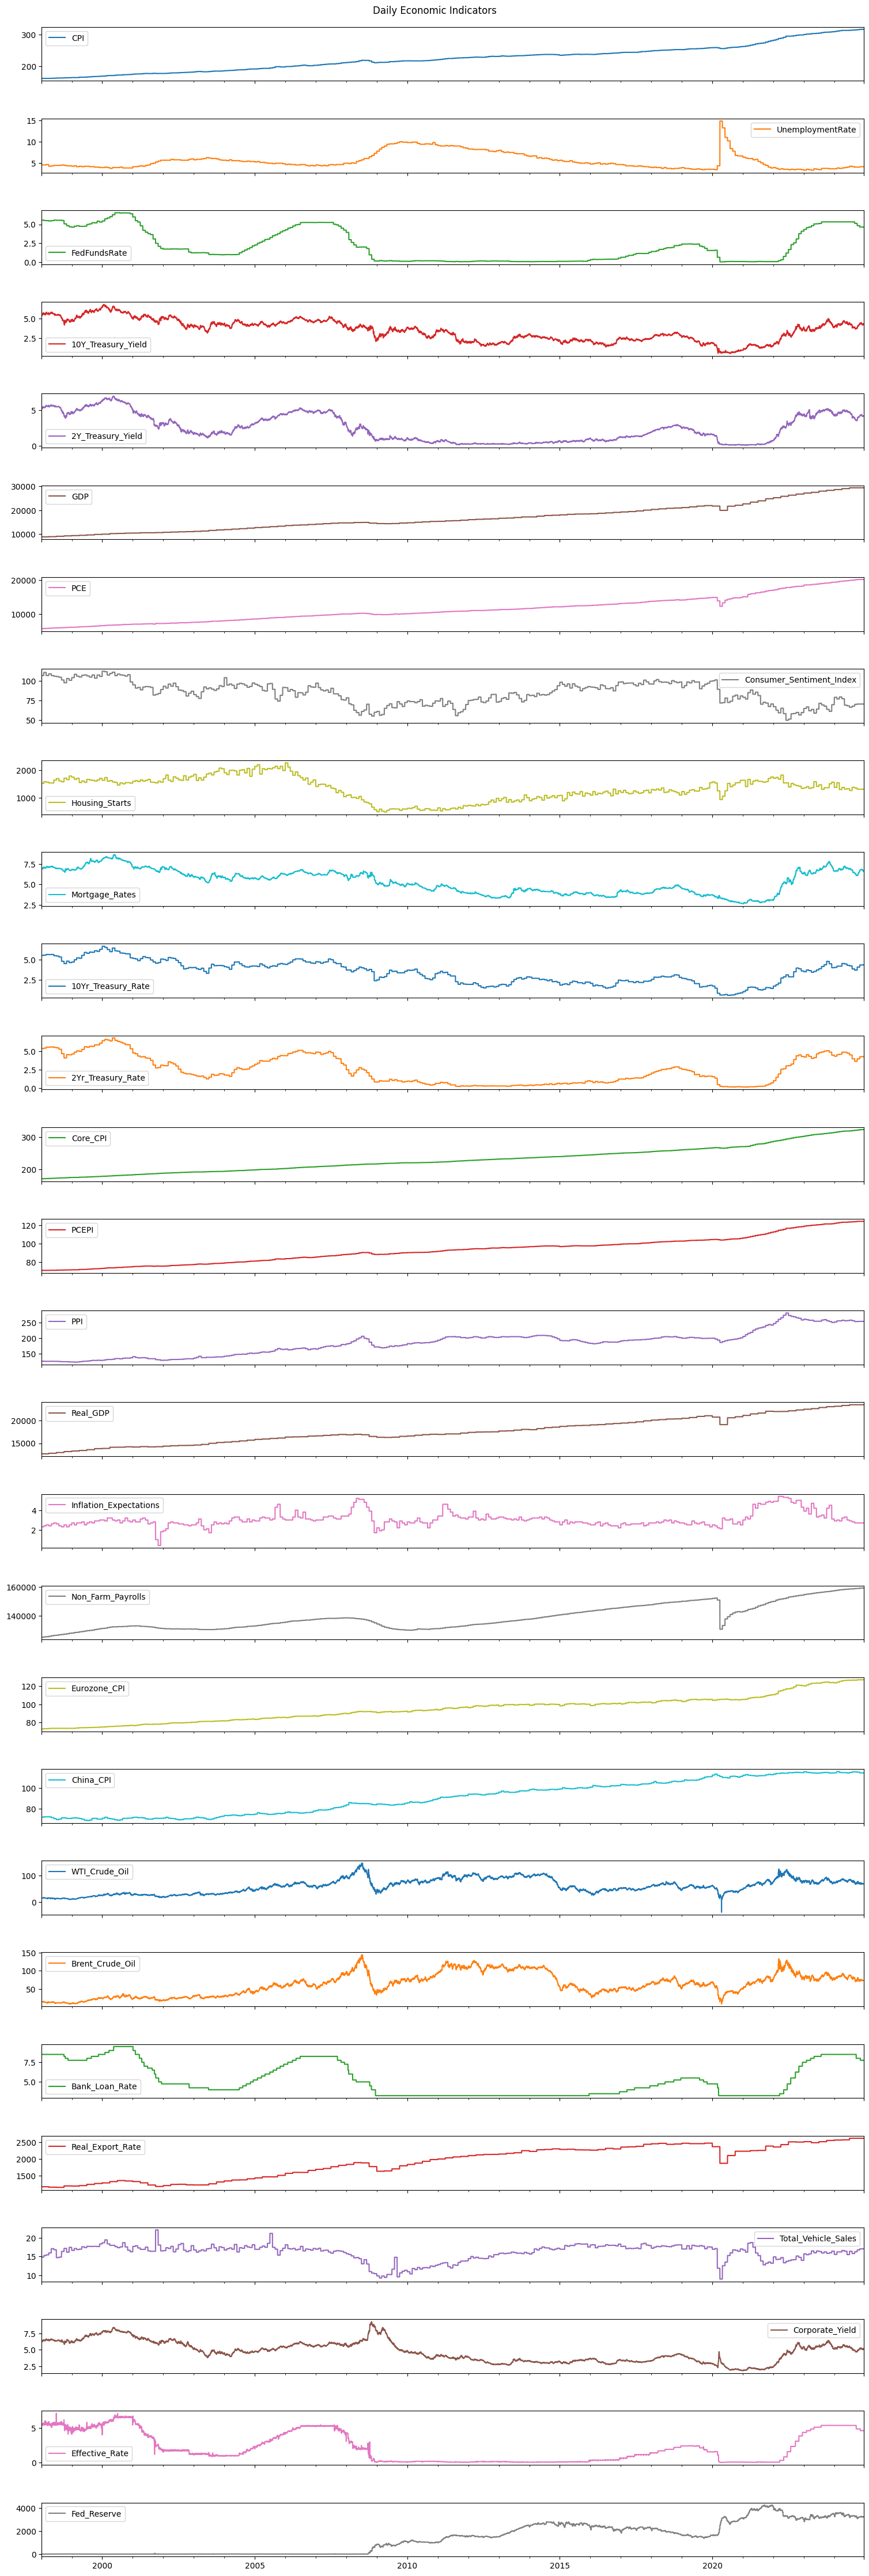

In [119]:
# Plot the data to check alignment
daily_data.plot(subplots=True, figsize=(16, 46), title='Daily Economic Indicators')
plt.tight_layout(pad=4.0)
plt.show()

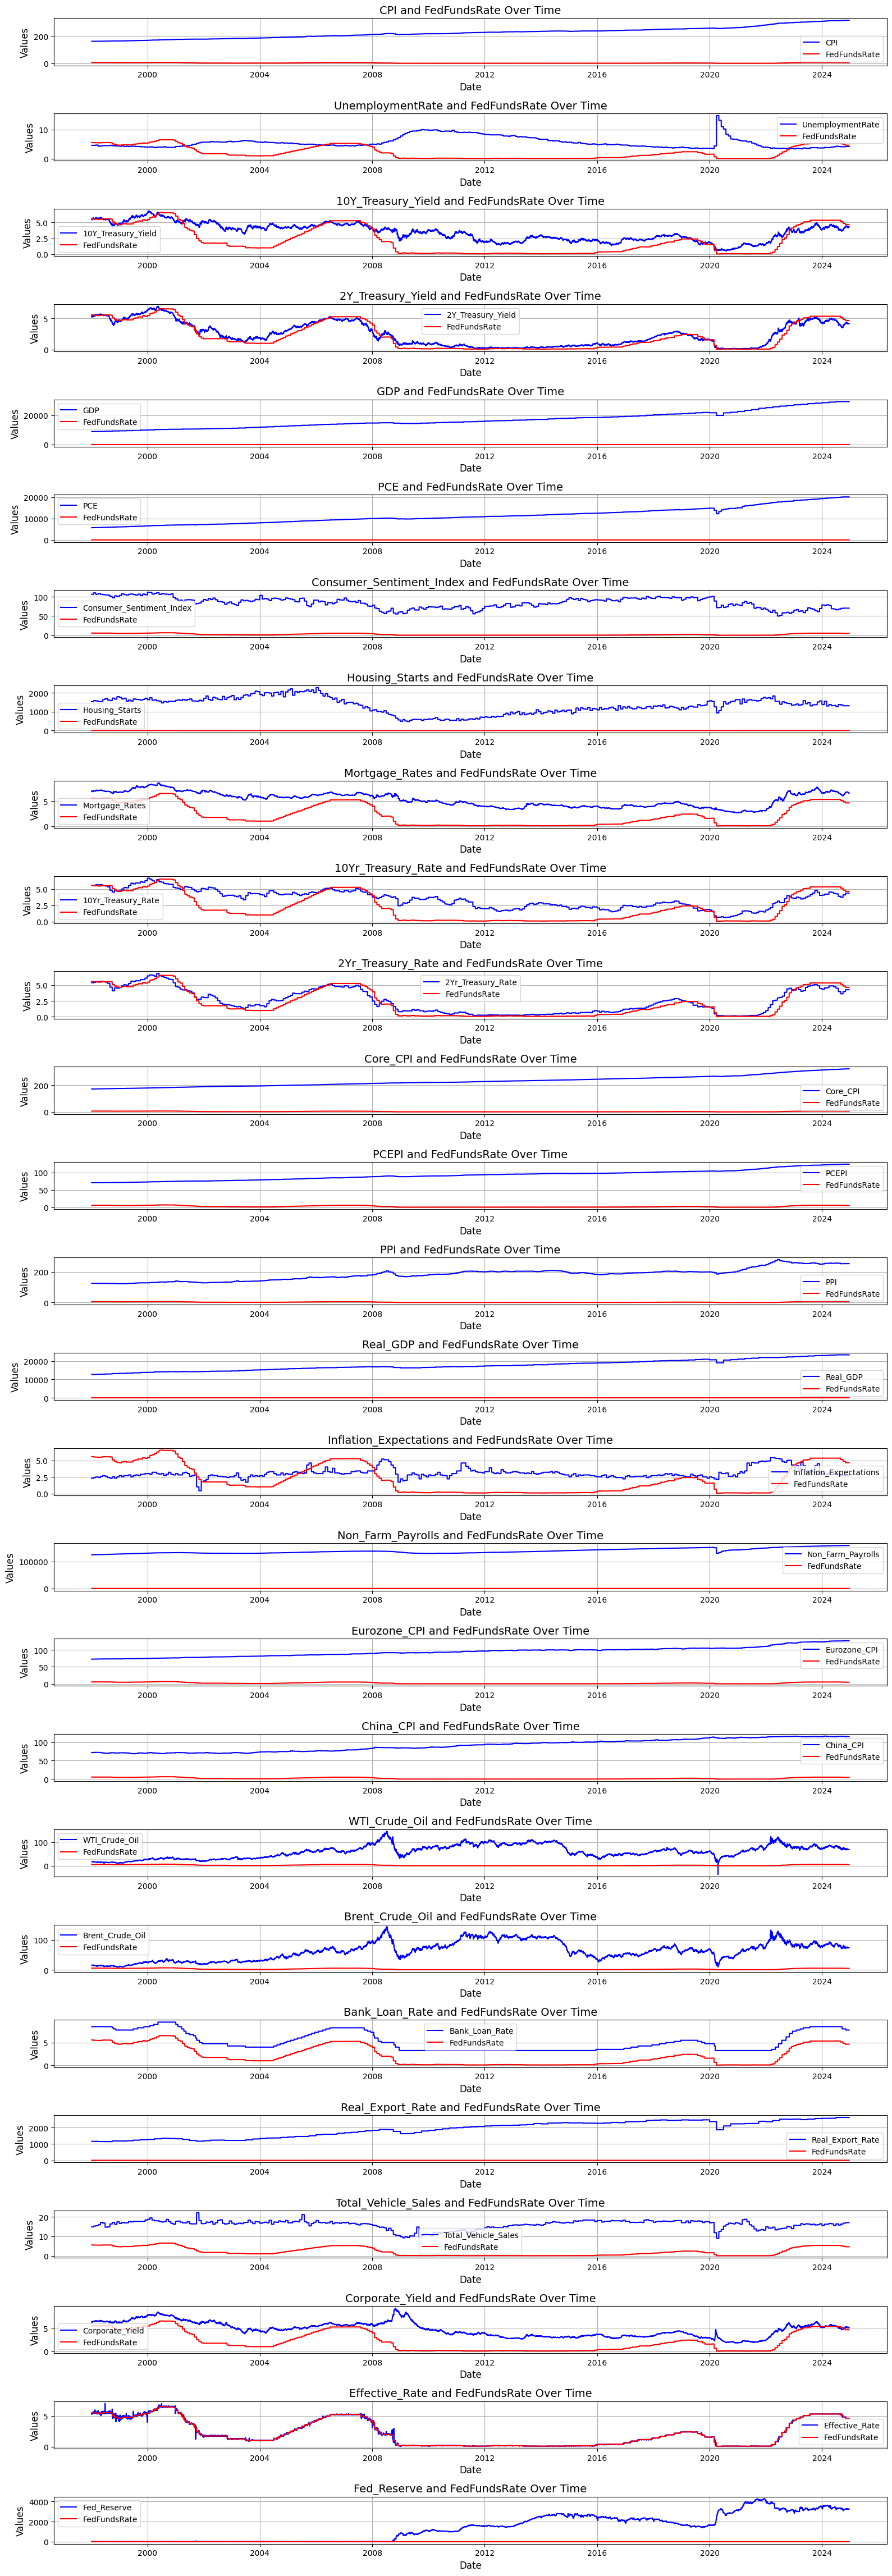

In [120]:
# Exclude 'FedFundsRate' from the list of columns to plot
columns_to_plot = daily_data.columns.drop('FedFundsRate')

# Set the size of the overall plot
plt.figure(figsize=(16, 46))

# Iterate over each column and plot it alongside FedFundsRate
for i, col in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1)
    plt.plot(daily_data.index, daily_data[col], label=col, color='blue')  # Plot each variable
    plt.plot(daily_data.index, daily_data['FedFundsRate'], label='FedFundsRate', color='red')  # Plot FedFundsRate
    plt.title(f'{col} and FedFundsRate Over Time', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.legend()  # Add a legend to distinguish the two lines
    plt.grid(True)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

Top Correlations with FedFundsRate:
FedFundsRate          1.000000
Effective_Rate        0.998505
Bank_Loan_Rate        0.998422
2Yr_Treasury_Rate     0.962625
2Y_Treasury_Yield     0.961551
Mortgage_Rates        0.832862
10Yr_Treasury_Rate    0.789964
10Y_Treasury_Yield    0.787820
Corporate_Yield       0.710462
Housing_Starts        0.484668
Name: FedFundsRate, dtype: float64


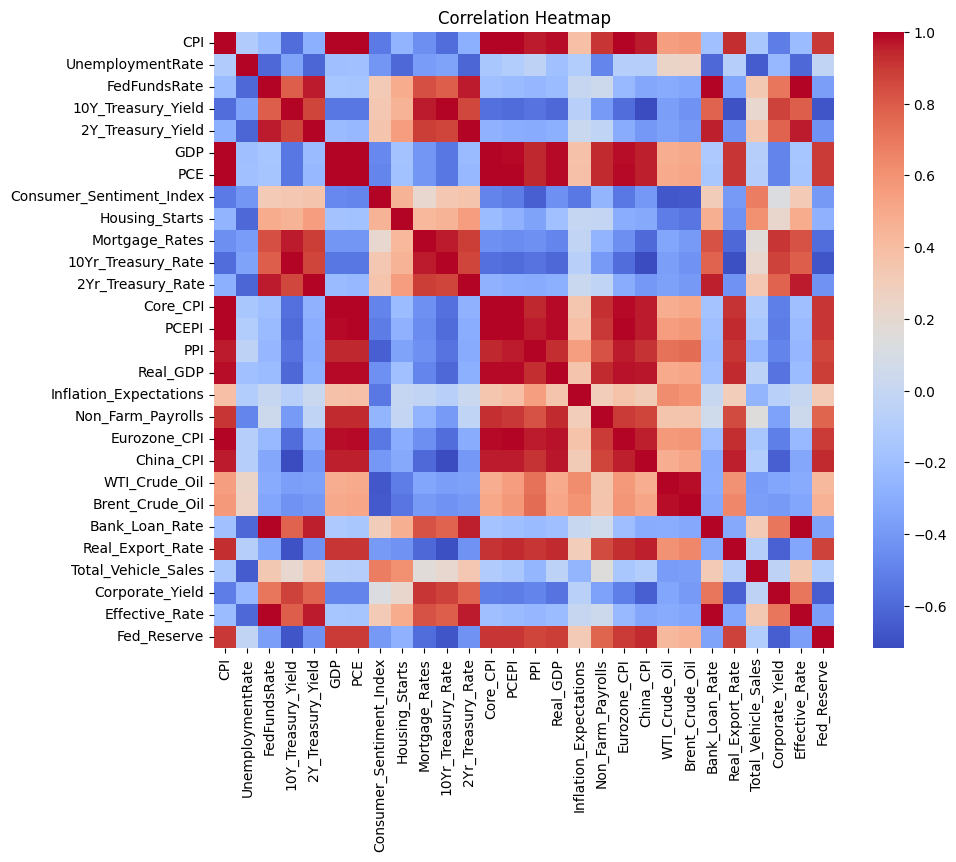

In [121]:
# Import required libraries
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = daily_data.corr()

# Correlation with 'FedFundsRate'
fed_rate_corr = correlation_matrix['FedFundsRate'].sort_values(ascending=False)
print("Top Correlations with FedFundsRate:")
print(fed_rate_corr.head(10))

# Heatmap for top correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

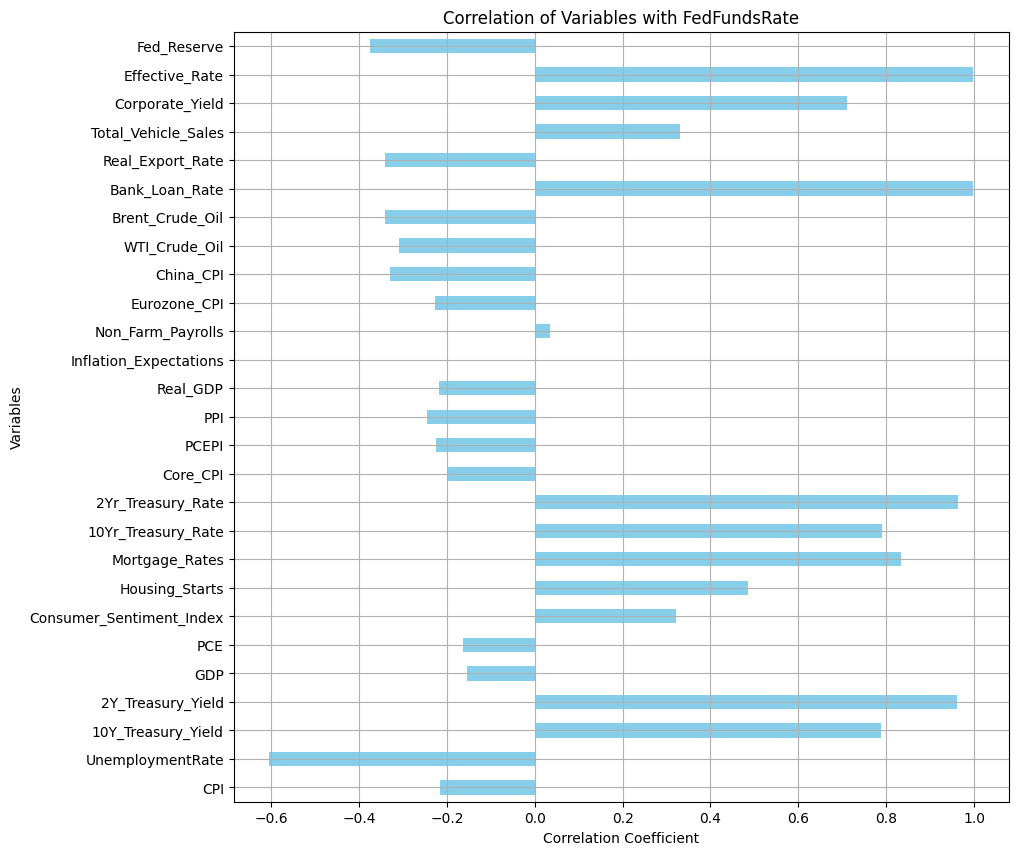

In [122]:
# Calculate the correlation of all columns with 'FedFundsRate'
correlations = daily_data.corr()['FedFundsRate']

# Create a plot for each correlation
plt.figure(figsize=(10, 10))  # Size of the plot
correlations.drop('FedFundsRate').plot(kind='barh', color='skyblue')  # Drop FedFundsRate from itself

# Customize the plot
plt.title('Correlation of Variables with FedFundsRate')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)

# Show the plot
plt.show()

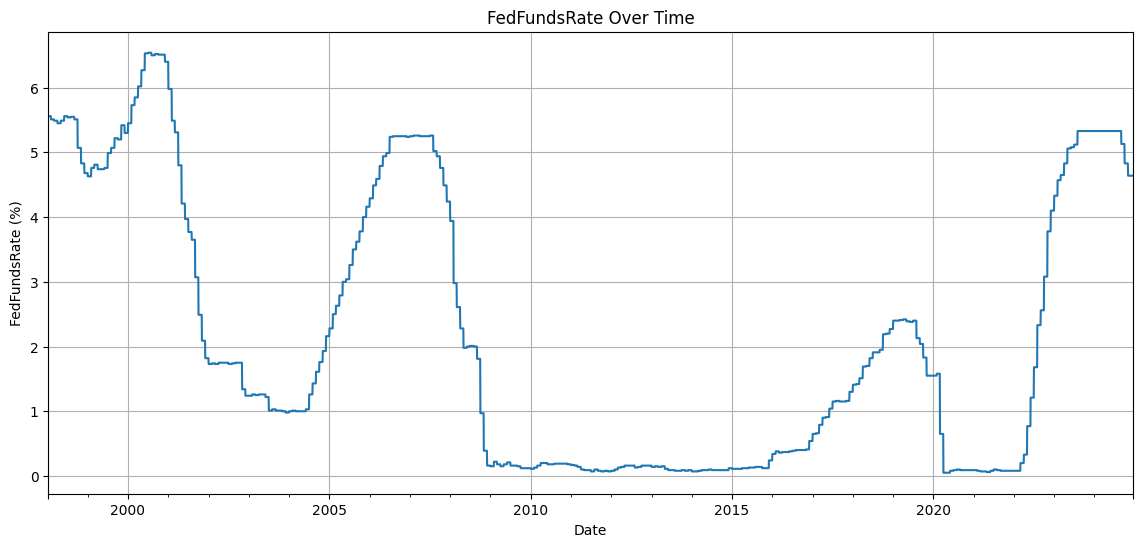

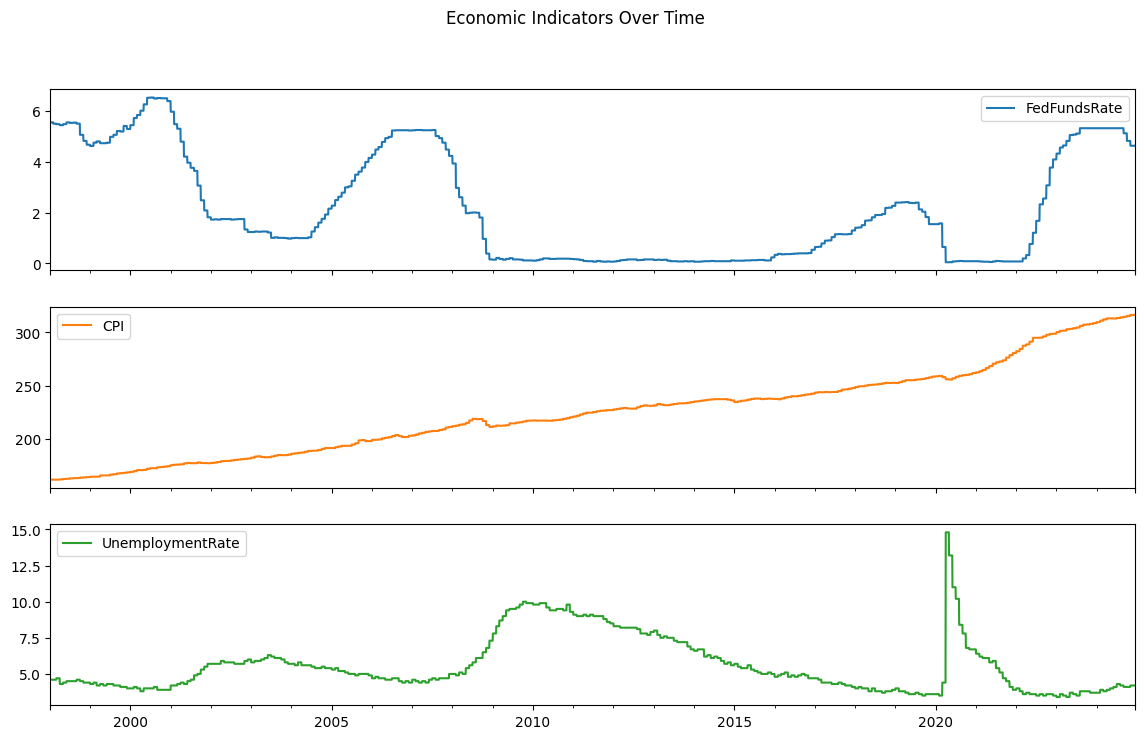

In [123]:
# Visualize Trends Over Time

# Plot FedFundsRate over time
plt.figure(figsize=(14, 6))
daily_data['FedFundsRate'].plot()
plt.title("FedFundsRate Over Time")
plt.xlabel("Date")
plt.ylabel("FedFundsRate (%)")
plt.grid(True)
plt.show()

# Compare with CPI and UnemploymentRate
daily_data[['FedFundsRate', 'CPI', 'UnemploymentRate']].plot(subplots=True, figsize=(14, 8))
plt.suptitle("Economic Indicators Over Time")
plt.show()

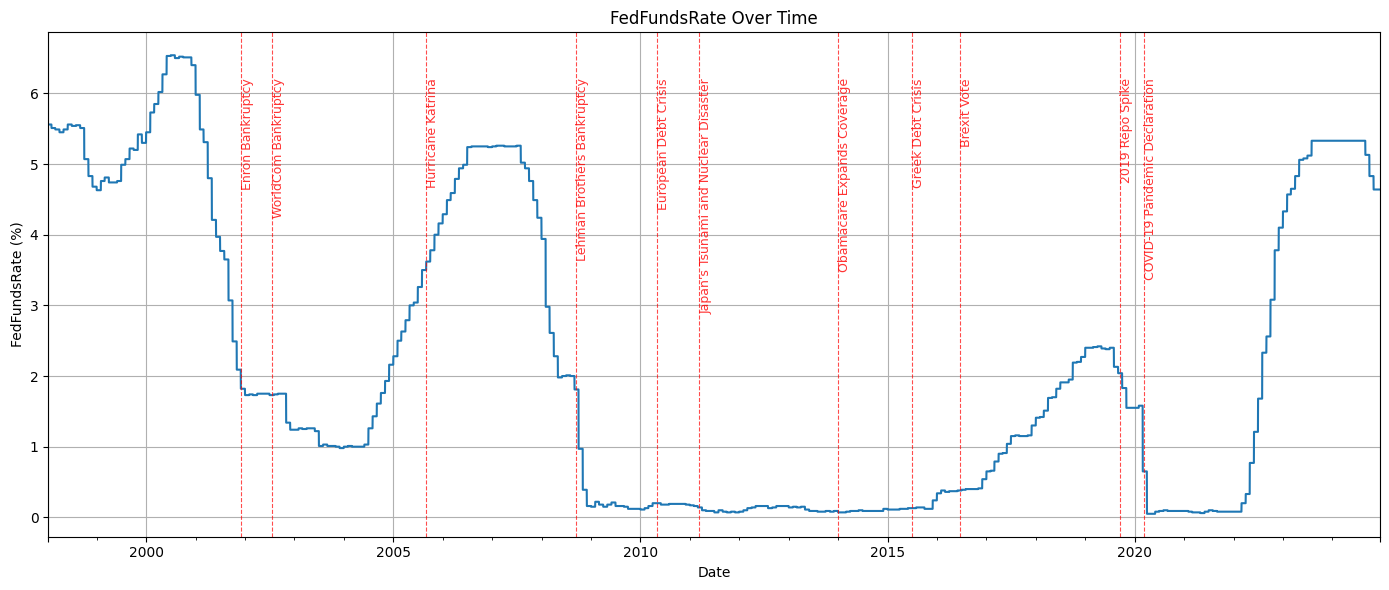

In [124]:
# Economic Events vs. FedFundsRate

# Plot FedFundsRate over time
plt.figure(figsize=(14, 6))
daily_data['FedFundsRate'].plot()

# Add vertical lines and labels for economic events
economic_events = {
    '2001-12-02': 'Enron Bankruptcy',
    '2002-07-21': 'WorldCom Bankruptcy',
    '2005-08-29': 'Hurricane Katrina',
    '2008-09-15': 'Lehman Brothers Bankruptcy',
    '2010-05-01': 'European Debt Crisis',
    '2011-03-11': 'Japan\'s Tsunami and Nuclear Disaster',
    '2014-01-01': 'Obamacare Expands Coverage',
    '2015-07-01': 'Greek Debt Crisis',
    '2016-06-23': 'Brexit Vote',
    '2019-09-17': '2019 Repo Spike',
    '2020-03-11': 'COVID-19 Pandemic Declaration'
}

for date, event in economic_events.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=0.8, alpha=0.7)
    plt.text(pd.to_datetime(date), daily_data['FedFundsRate'].max() * 0.95, event, 
             rotation=90, fontsize=9, color='red', alpha=0.8, verticalalignment='top')

# Customize the plot
plt.title("FedFundsRate Over Time")
plt.xlabel("Date")
plt.ylabel("FedFundsRate (%)")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

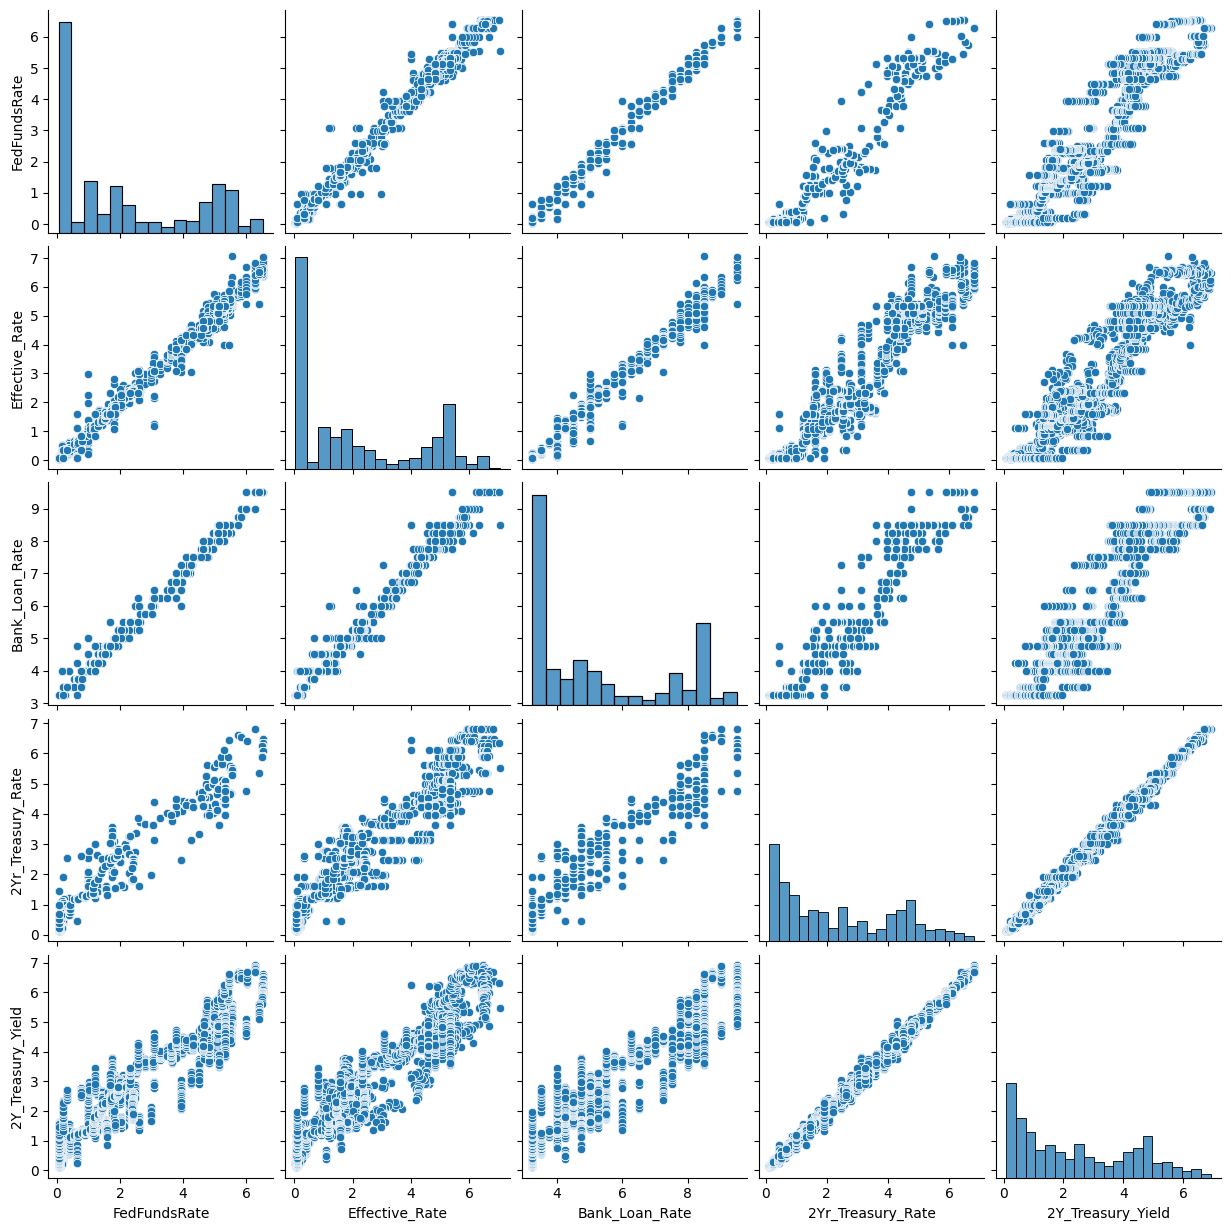

In [125]:
# Pairplots for Relationships

# Subset of highly correlated features
top_features = fed_rate_corr.head(5).index.tolist()
sns.pairplot(daily_data[top_features])
plt.show()

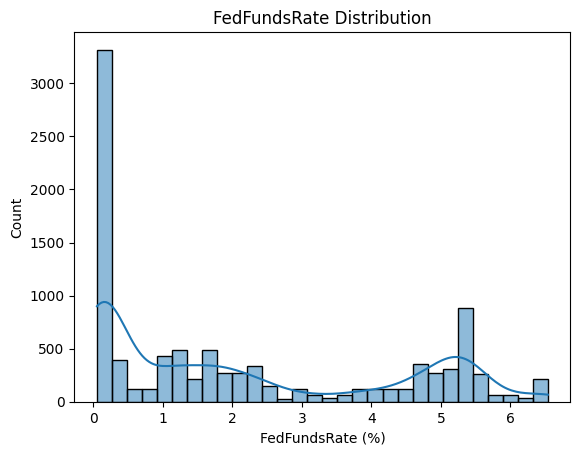

In [126]:
# Distribution of FedFundsRate

sns.histplot(daily_data['FedFundsRate'], kde=True, bins=30)
plt.title("FedFundsRate Distribution")
plt.xlabel("FedFundsRate (%)")
plt.show()

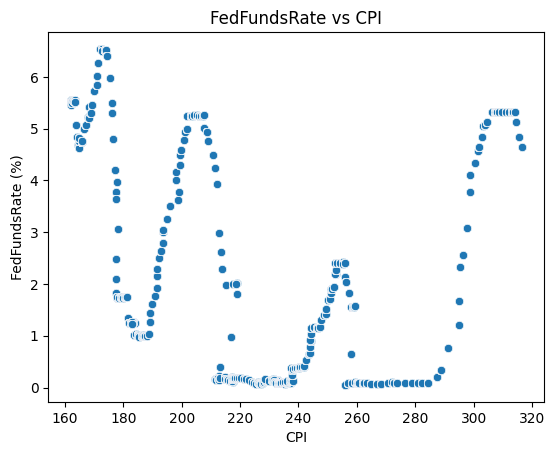

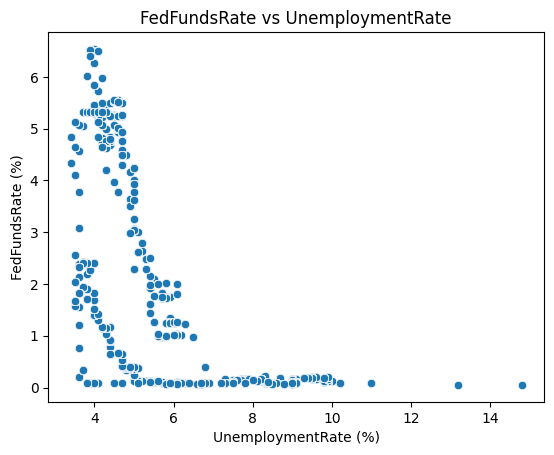

In [127]:
# Scatterplots for Key Drivers

sns.scatterplot(x='CPI', y='FedFundsRate', data=daily_data)
plt.title("FedFundsRate vs CPI")
plt.xlabel("CPI")
plt.ylabel("FedFundsRate (%)")
plt.show()

sns.scatterplot(x='UnemploymentRate', y='FedFundsRate', data=daily_data)
plt.title("FedFundsRate vs UnemploymentRate")
plt.xlabel("UnemploymentRate (%)")
plt.ylabel("FedFundsRate (%)")
plt.show()

Non-Linear Relationships
Explore whether relationships between FedFundsRate and predictors are non-linear using advanced tools like polynomial fits or GAMs.

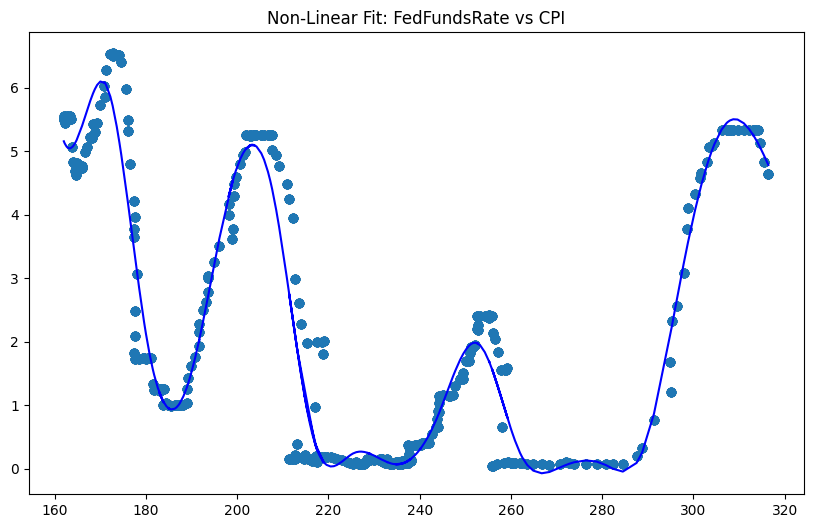

In [129]:
from pygam import LinearGAM, s

# Fit a GAM for FedFundsRate vs CPI
gam = LinearGAM(s(0)).fit(daily_data['CPI'], daily_data['FedFundsRate'])
plt.figure(figsize=(10, 6))
plt.plot(daily_data['CPI'], gam.predict(daily_data['CPI']), color='blue')
plt.scatter(daily_data['CPI'], daily_data['FedFundsRate'], alpha=0.3)
plt.title("Non-Linear Fit: FedFundsRate vs CPI")
plt.show()

           CPI                                                             \
         count        mean        std      min      25%      50%      75%   
Decade                                                                      
1990     724.0  164.827762   2.123260  162.000  163.200  164.700  166.700   
2000    3653.0  193.607652  14.948403  169.300  180.000  191.700  207.603   
2010    3652.0  237.119517  11.024800  217.199  229.092  237.231  244.243   
2020    1814.0  287.962936  20.783419  255.848  264.910  294.977  307.288   

                UnemploymentRate            ... Effective_Rate        \
            max            count      mean  ...            75%   max   
Decade                                      ...                        
1990    168.800            724.0  4.355387  ...           5.47  7.06   
2000    219.016           3653.0  5.542349  ...           5.00  7.03   
2010    258.630           3652.0  6.219715  ...           1.16  2.45   
2020    316.441           18

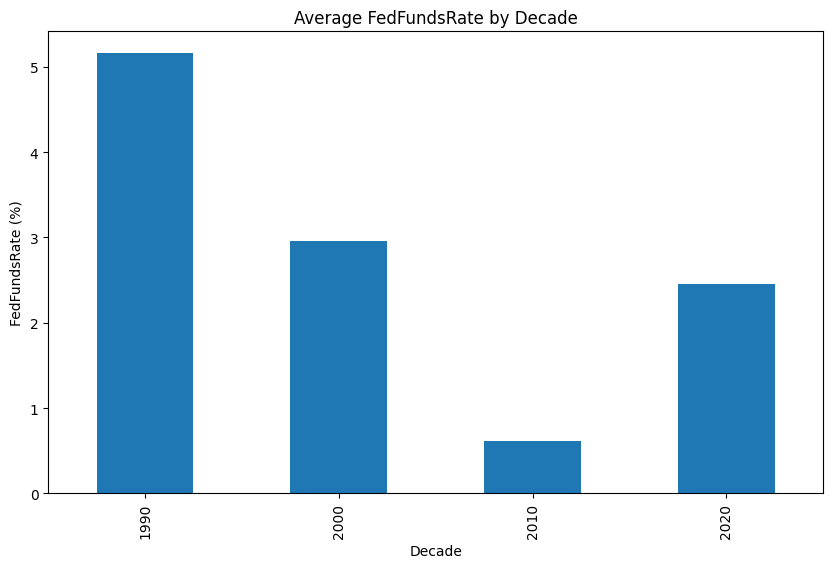

In [130]:
# Compare descriptive stats between different decades
daily_data['Decade'] = (daily_data.index.year // 10) * 10  # Group by decades
decade_summary = daily_data.groupby('Decade').describe()
print(decade_summary)

# Plot mean FedFundsRate by decade
daily_data.groupby('Decade')['FedFundsRate'].mean().plot(kind='bar', figsize=(10, 6))
plt.title("Average FedFundsRate by Decade")
plt.ylabel("FedFundsRate (%)")
plt.show()

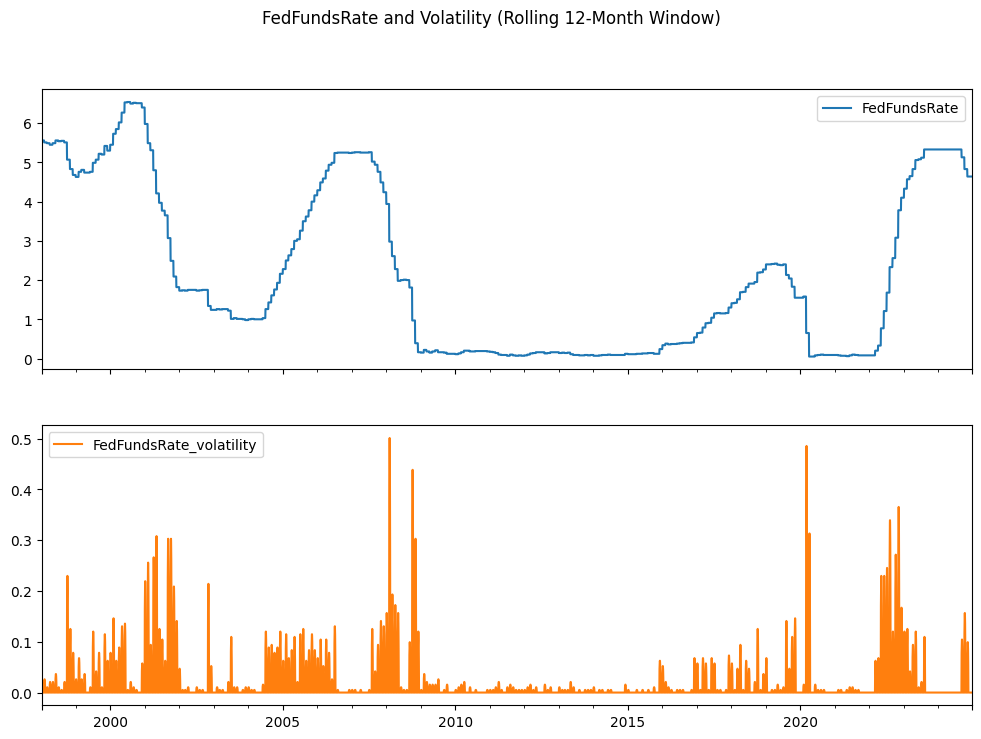

In [131]:
# Rolling volatility as a proxy for economic uncertainty
daily_data['FedFundsRate_volatility'] = daily_data['FedFundsRate'].rolling(window=12).std()

# Plot rolling statistics
daily_data[['FedFundsRate', 'FedFundsRate_volatility']].plot(subplots=True, figsize=(12, 8))
plt.suptitle("FedFundsRate and Volatility (Rolling 12-Month Window)")
plt.show()

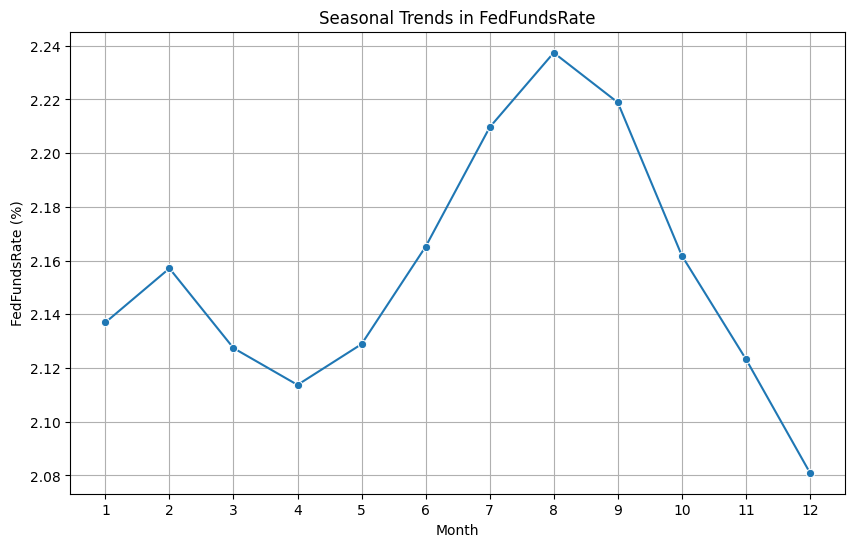

In [132]:
# Seasonality Analysis

# Extract month and year for seasonality analysis
daily_data['Month'] = daily_data.index.month
monthly_avg = daily_data.groupby('Month')['FedFundsRate'].mean()

# Plot seasonal pattern
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title("Seasonal Trends in FedFundsRate")
plt.xlabel("Month")
plt.ylabel("FedFundsRate (%)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

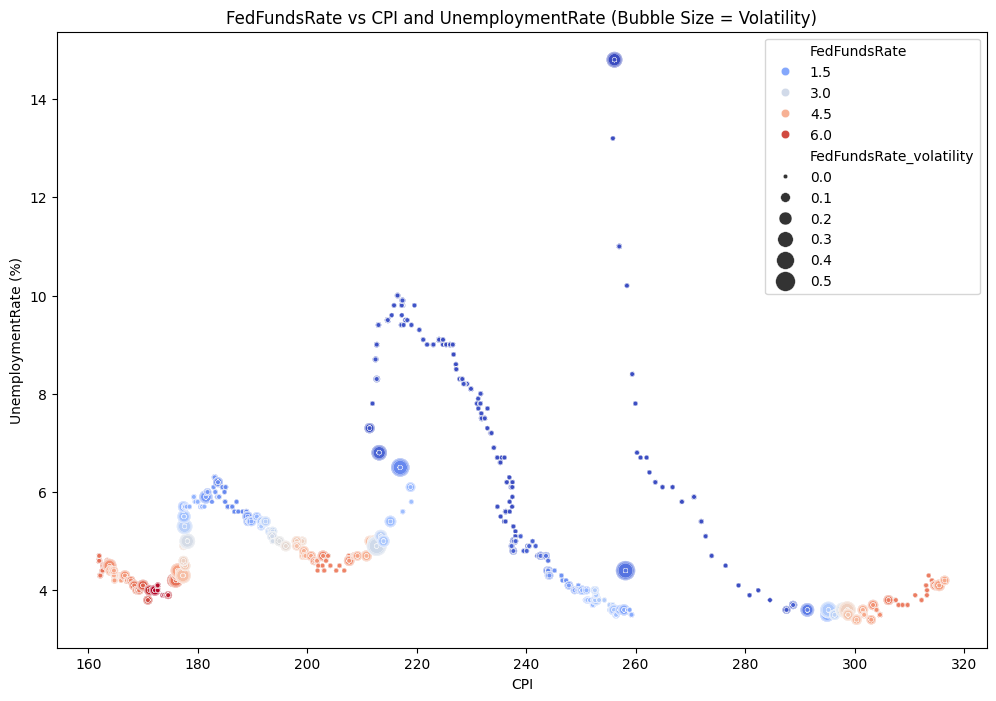

In [133]:
# Bubble Plot for Macro Relationships

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='CPI', y='UnemploymentRate', size='FedFundsRate_volatility',
    sizes=(10, 200), data=daily_data, hue='FedFundsRate', palette='coolwarm'
)
plt.title("FedFundsRate vs CPI and UnemploymentRate (Bubble Size = Volatility)")
plt.xlabel("CPI")
plt.ylabel("UnemploymentRate (%)")
plt.legend(loc='best')
plt.show()

Granular Correlation and Feature Importance

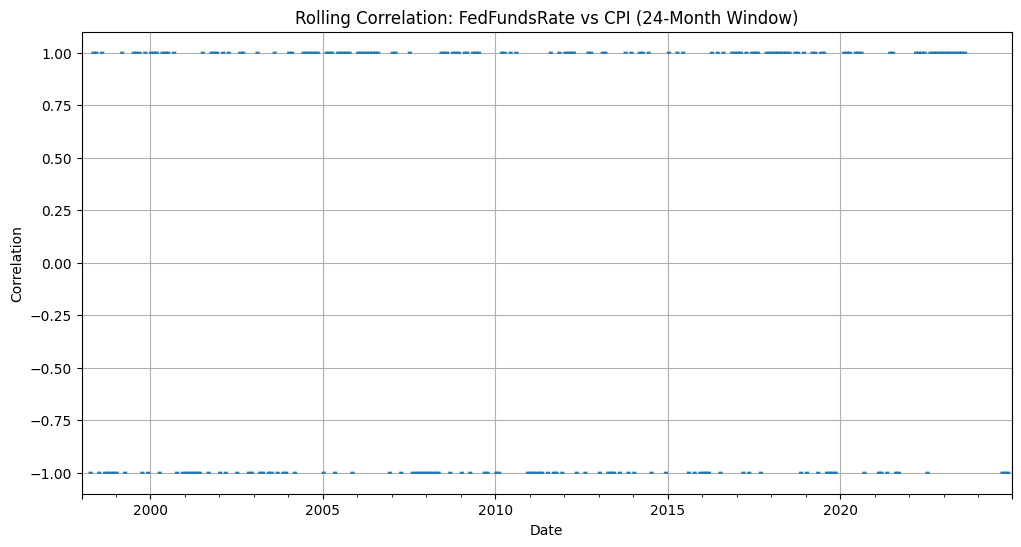

In [135]:
# Dynamic Correlations

rolling_corr = daily_data['FedFundsRate'].rolling(window=24).corr(daily_data['CPI'])

plt.figure(figsize=(12, 6))
rolling_corr.plot()
plt.title("Rolling Correlation: FedFundsRate vs CPI (24-Month Window)")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

SHAP and Feature Importance
Use tree-based models to estimate feature importance.

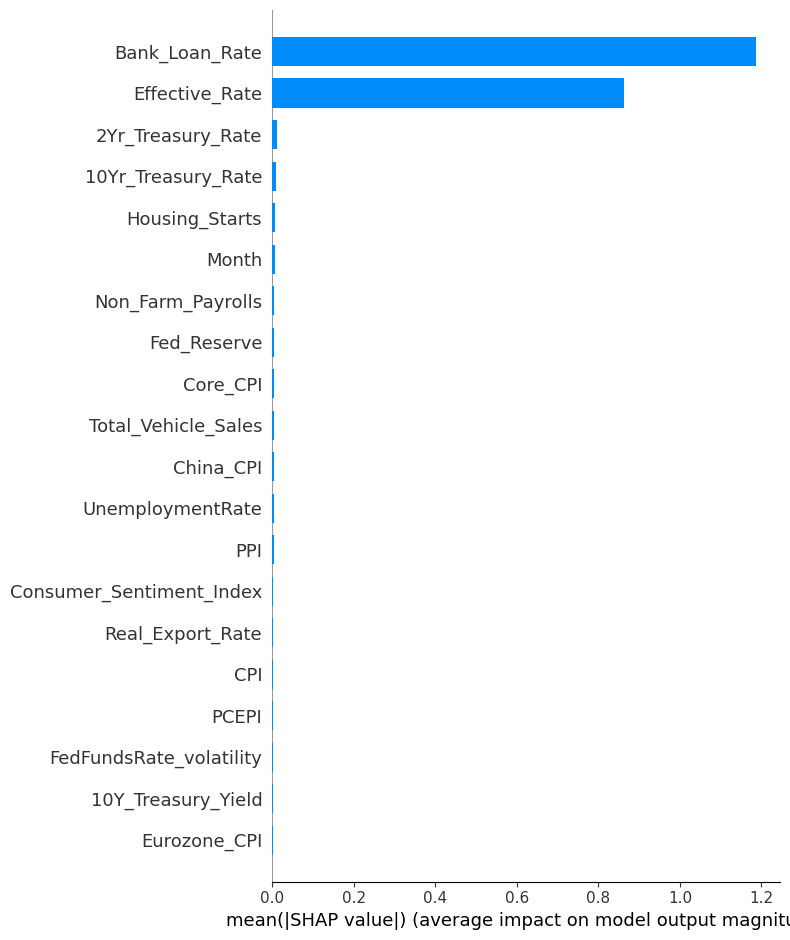

In [142]:
from sklearn.ensemble import RandomForestRegressor
import shap

# Prepare data for modeling
X = daily_data.drop(columns=['FedFundsRate'])
y = daily_data['FedFundsRate']
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X, y)

# SHAP explanation
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type='bar')

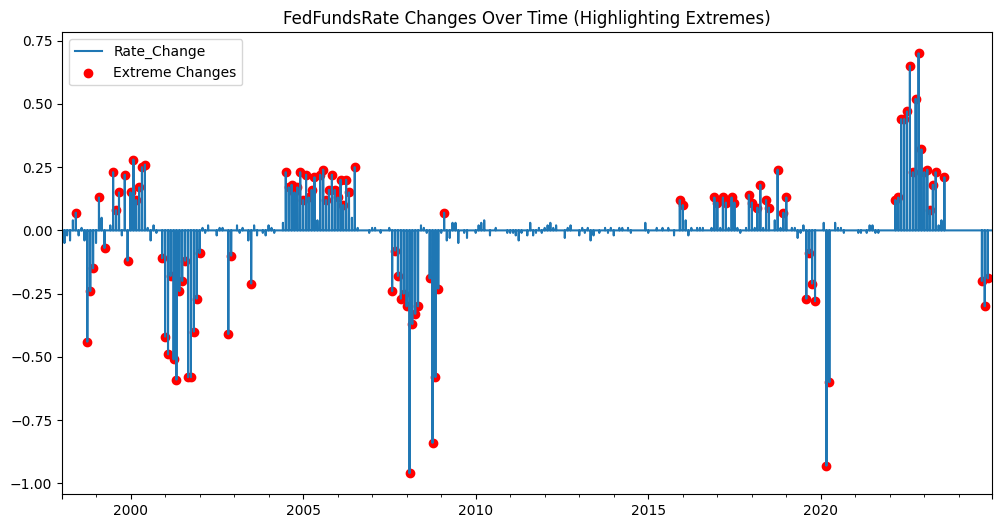

In [143]:
# Extreme Events Analysis
# Highlight outlier periods with extreme FedFundsRate movements.

# Identify large rate changes
daily_data['Rate_Change'] = daily_data['FedFundsRate'].diff()
extreme_changes = daily_data[daily_data['Rate_Change'].abs() > daily_data['Rate_Change'].std() * 2]

# Plot extreme changes
plt.figure(figsize=(12, 6))
daily_data['Rate_Change'].plot()
plt.scatter(extreme_changes.index, extreme_changes['Rate_Change'], color='red', label='Extreme Changes')
plt.title("FedFundsRate Changes Over Time (Highlighting Extremes)")
plt.legend()
plt.show()

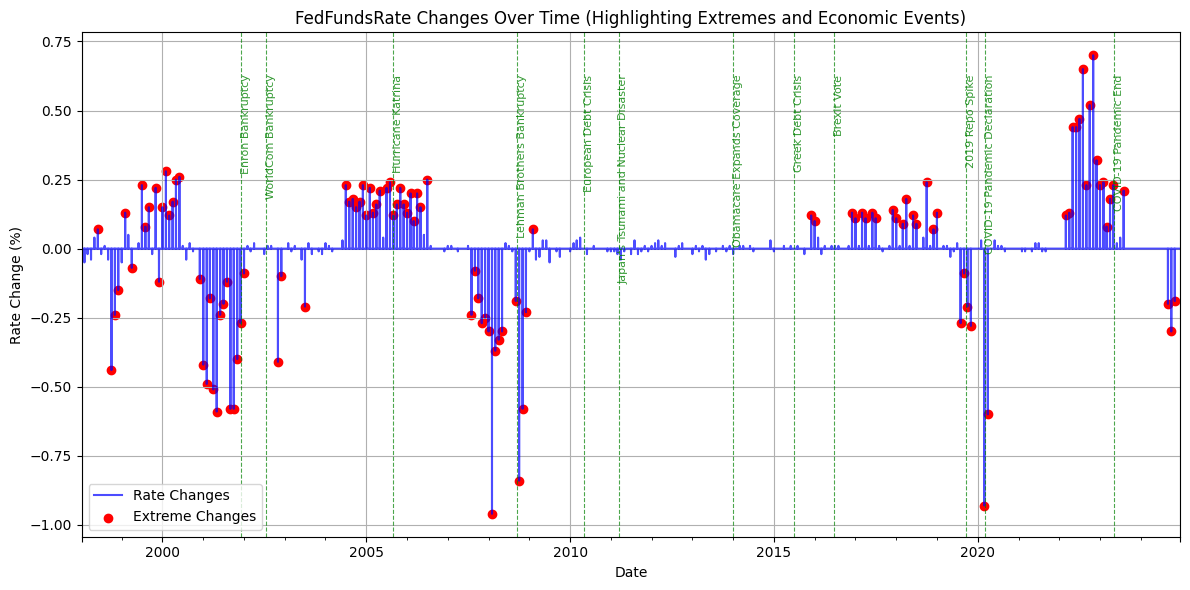

In [144]:
# Identify large rate changes
daily_data['Rate_Change'] = daily_data['FedFundsRate'].diff()
extreme_changes = daily_data[daily_data['Rate_Change'].abs() > daily_data['Rate_Change'].std() * 2]

# Plot extreme changes
plt.figure(figsize=(12, 6))
daily_data['Rate_Change'].plot(label='Rate Changes', color='blue', alpha=0.7)
plt.scatter(extreme_changes.index, extreme_changes['Rate_Change'], color='red', label='Extreme Changes')

# Add vertical lines and labels for economic events
economic_events = {
    '2001-12-02': 'Enron Bankruptcy',
    '2002-07-21': 'WorldCom Bankruptcy',
    '2005-08-29': 'Hurricane Katrina',
    '2008-09-15': 'Lehman Brothers Bankruptcy',
    '2010-05-01': 'European Debt Crisis',
    '2011-03-11': 'Japan\'s Tsunami and Nuclear Disaster',
    '2014-01-01': 'Obamacare Expands Coverage',
    '2015-07-01': 'Greek Debt Crisis',
    '2016-06-23': 'Brexit Vote',
    '2019-09-17': '2019 Repo Spike',
    '2020-03-11': 'COVID-19 Pandemic Declaration',
    '2023-05-11': 'COVID-19 Pandemic End'
}

for date, event in economic_events.items():
    plt.axvline(pd.to_datetime(date), color='green', linestyle='--', linewidth=0.8, alpha=0.7)
    plt.text(pd.to_datetime(date), daily_data['Rate_Change'].max() * 0.9, event,
             rotation=90, fontsize=8, color='green', alpha=0.8, verticalalignment='top')

# Customize the plot
plt.title("FedFundsRate Changes Over Time (Highlighting Extremes and Economic Events)")
plt.xlabel("Date")
plt.ylabel("Rate Change (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [145]:
# End of this script